In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statistics
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('airplane.csv')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124297,25971,78463,Male,disloyal Customer,34,Business travel,Business,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,neutral or dissatisfied
124298,25972,71167,Male,Loyal Customer,23,Business travel,Business,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,satisfied
124299,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,neutral or dissatisfied
124300,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124302 entries, 0 to 124301
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         124302 non-null  int64  
 1   id                                 124302 non-null  int64  
 2   Gender                             124302 non-null  object 
 3   Customer Type                      124302 non-null  object 
 4   Age                                124302 non-null  int64  
 5   Type of Travel                     124302 non-null  object 
 6   Class                              124301 non-null  object 
 7   Flight Distance                    124301 non-null  float64
 8   Inflight wifi service              124301 non-null  float64
 9   Departure/Arrival time convenient  124301 non-null  float64
 10  Ease of Online booking             124301 non-null  float64
 11  Gate location                      1243

In [4]:
missing_row = df[df['Class'].isnull()]
missing_row

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
98325,98325,53552,Male,disloyal Customer,27,Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preprocessing** : Hapus row yang null pada col 6 - 24 (iloc[98325])

# Data Understanding

In [5]:
obj_features = df.select_dtypes(include=object).columns.to_list()
df[obj_features].describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,124302,124302,124302,124301,124301
unique,2,2,3,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,63080,101495,85864,59490,70287


gender, customer type, type of travel, class, satisfaction bisa label encode

In [6]:
pd.set_option('display.max_columns', None)
df.sample(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
21405,21405,103598,Female,disloyal Customer,27,Business travel,Business,405.0,0.0,0.0,0.0,3.0,2.0,0.0,2.0,2.0,3.0,5.0,4.0,3.0,4.0,2.0,6.0,7.0,satisfied
68978,68978,79460,Female,Loyal Customer,50,Business travel,Business,3820.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
10425,10425,69734,Female,Loyal Customer,62,Personal Travel,Eco,1372.0,3.0,4.0,2.0,2.0,3.0,4.0,4.0,1.0,1.0,2.0,1.0,3.0,1.0,4.0,0.0,0.0,neutral or dissatisfied
23556,23556,889,Male,disloyal Customer,17,Business travel,Eco,309.0,2.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,0.0,0.0,neutral or dissatisfied
18832,18832,97904,Female,Loyal Customer,50,Business travel,Business,3556.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0,2.0,0.0,satisfied


In [7]:
df['Gate location'].describe()

count    124301.000000
mean          2.976050
std           1.277901
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

Dari Inflight Wifi Service s/d Cleanliness, isinya semua berbentuk rating (0-5)

Dari kolom rating, dapat membuat rata-rata rating untuk setiap servis

Dari kolom rating, dapat dibagi menjadi 2 jenis pengelompokan, yaitu pengelompokan secara jenis servis (service, logistics, comfort), dan pengelompokan secara lokasi servis (onplane, offplane)

# EDA

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,124302.0,41602.832416,29417.385773,0.0,15537.25,36174.5,67249.75,98325.0
id,124302.0,64946.255458,37488.097474,1.0,32475.25,64968.5,97403.75,129880.0
Age,124302.0,39.429124,15.116242,7.0,27.00,40.0,51.00,85.0
Flight Distance,124301.0,1190.322902,997.037455,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,124301.0,2.728240,1.329128,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,124301.0,3.056677,1.527163,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,124301.0,2.756414,1.400961,0.0,2.00,3.0,4.00,5.0
Gate location,124301.0,2.976050,1.277901,0.0,2.00,3.0,4.00,5.0
Food and drink,124301.0,3.205574,1.330072,0.0,2.00,3.0,4.00,5.0
Online boarding,124301.0,3.253602,1.350411,0.0,2.00,3.0,4.00,5.0


Kemungkinan ada outlier di Depature Delay in Minutes dan Arrival Delay in Minutes

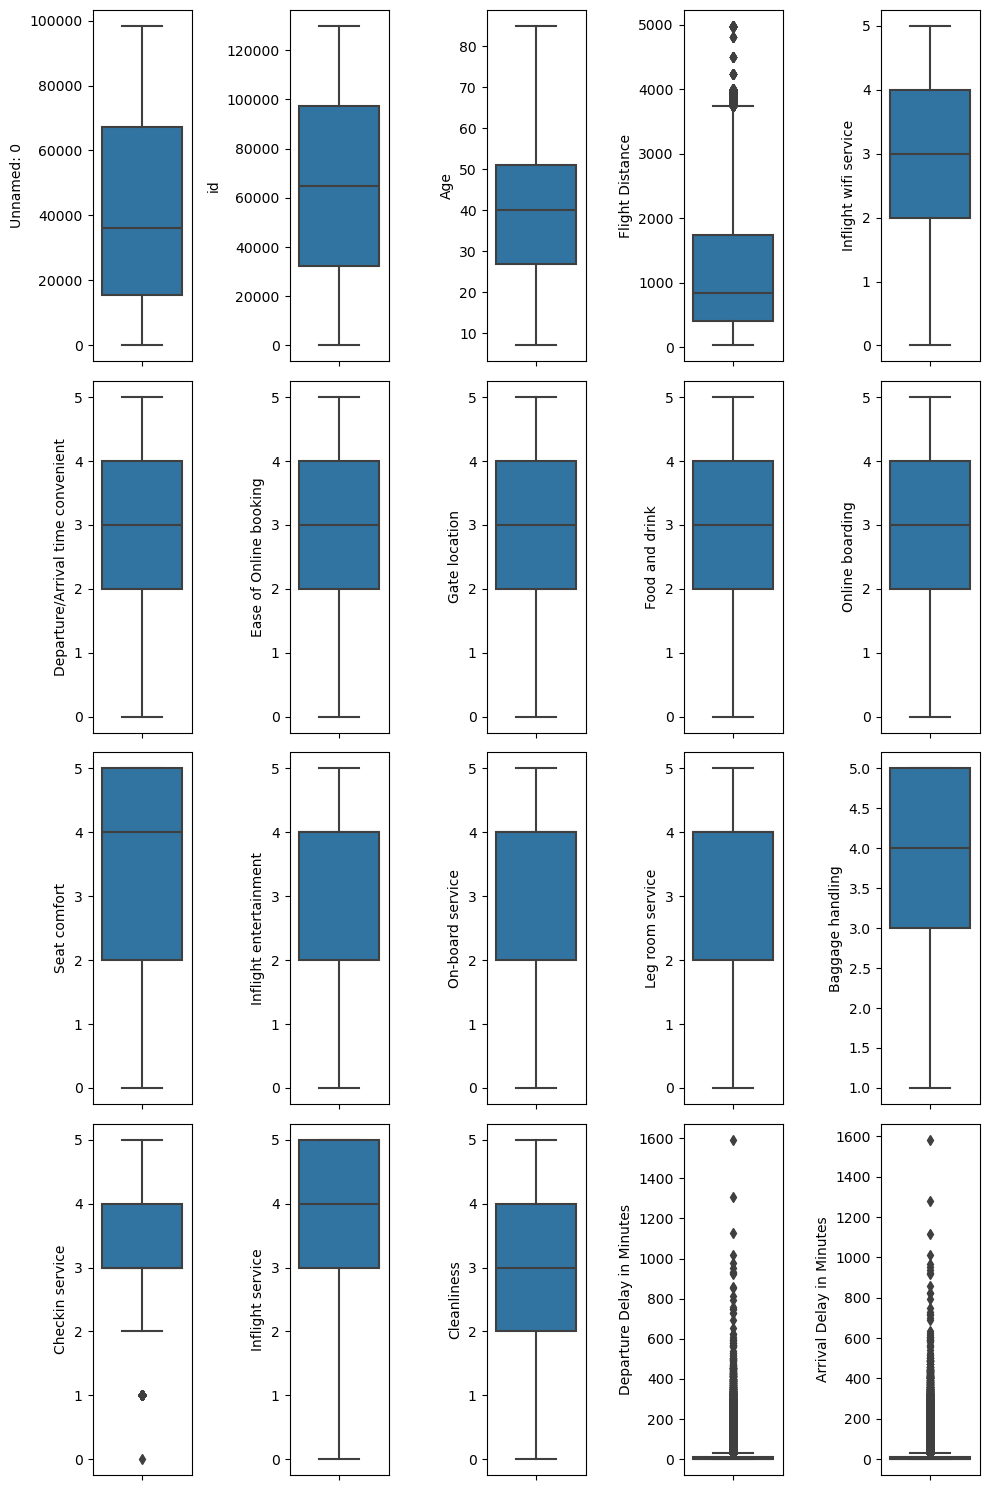

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,15))
for i in range(len(numerical_cols)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(data=df, y=numerical_cols[i], orient='v')
    
plt.tight_layout()
plt.show()

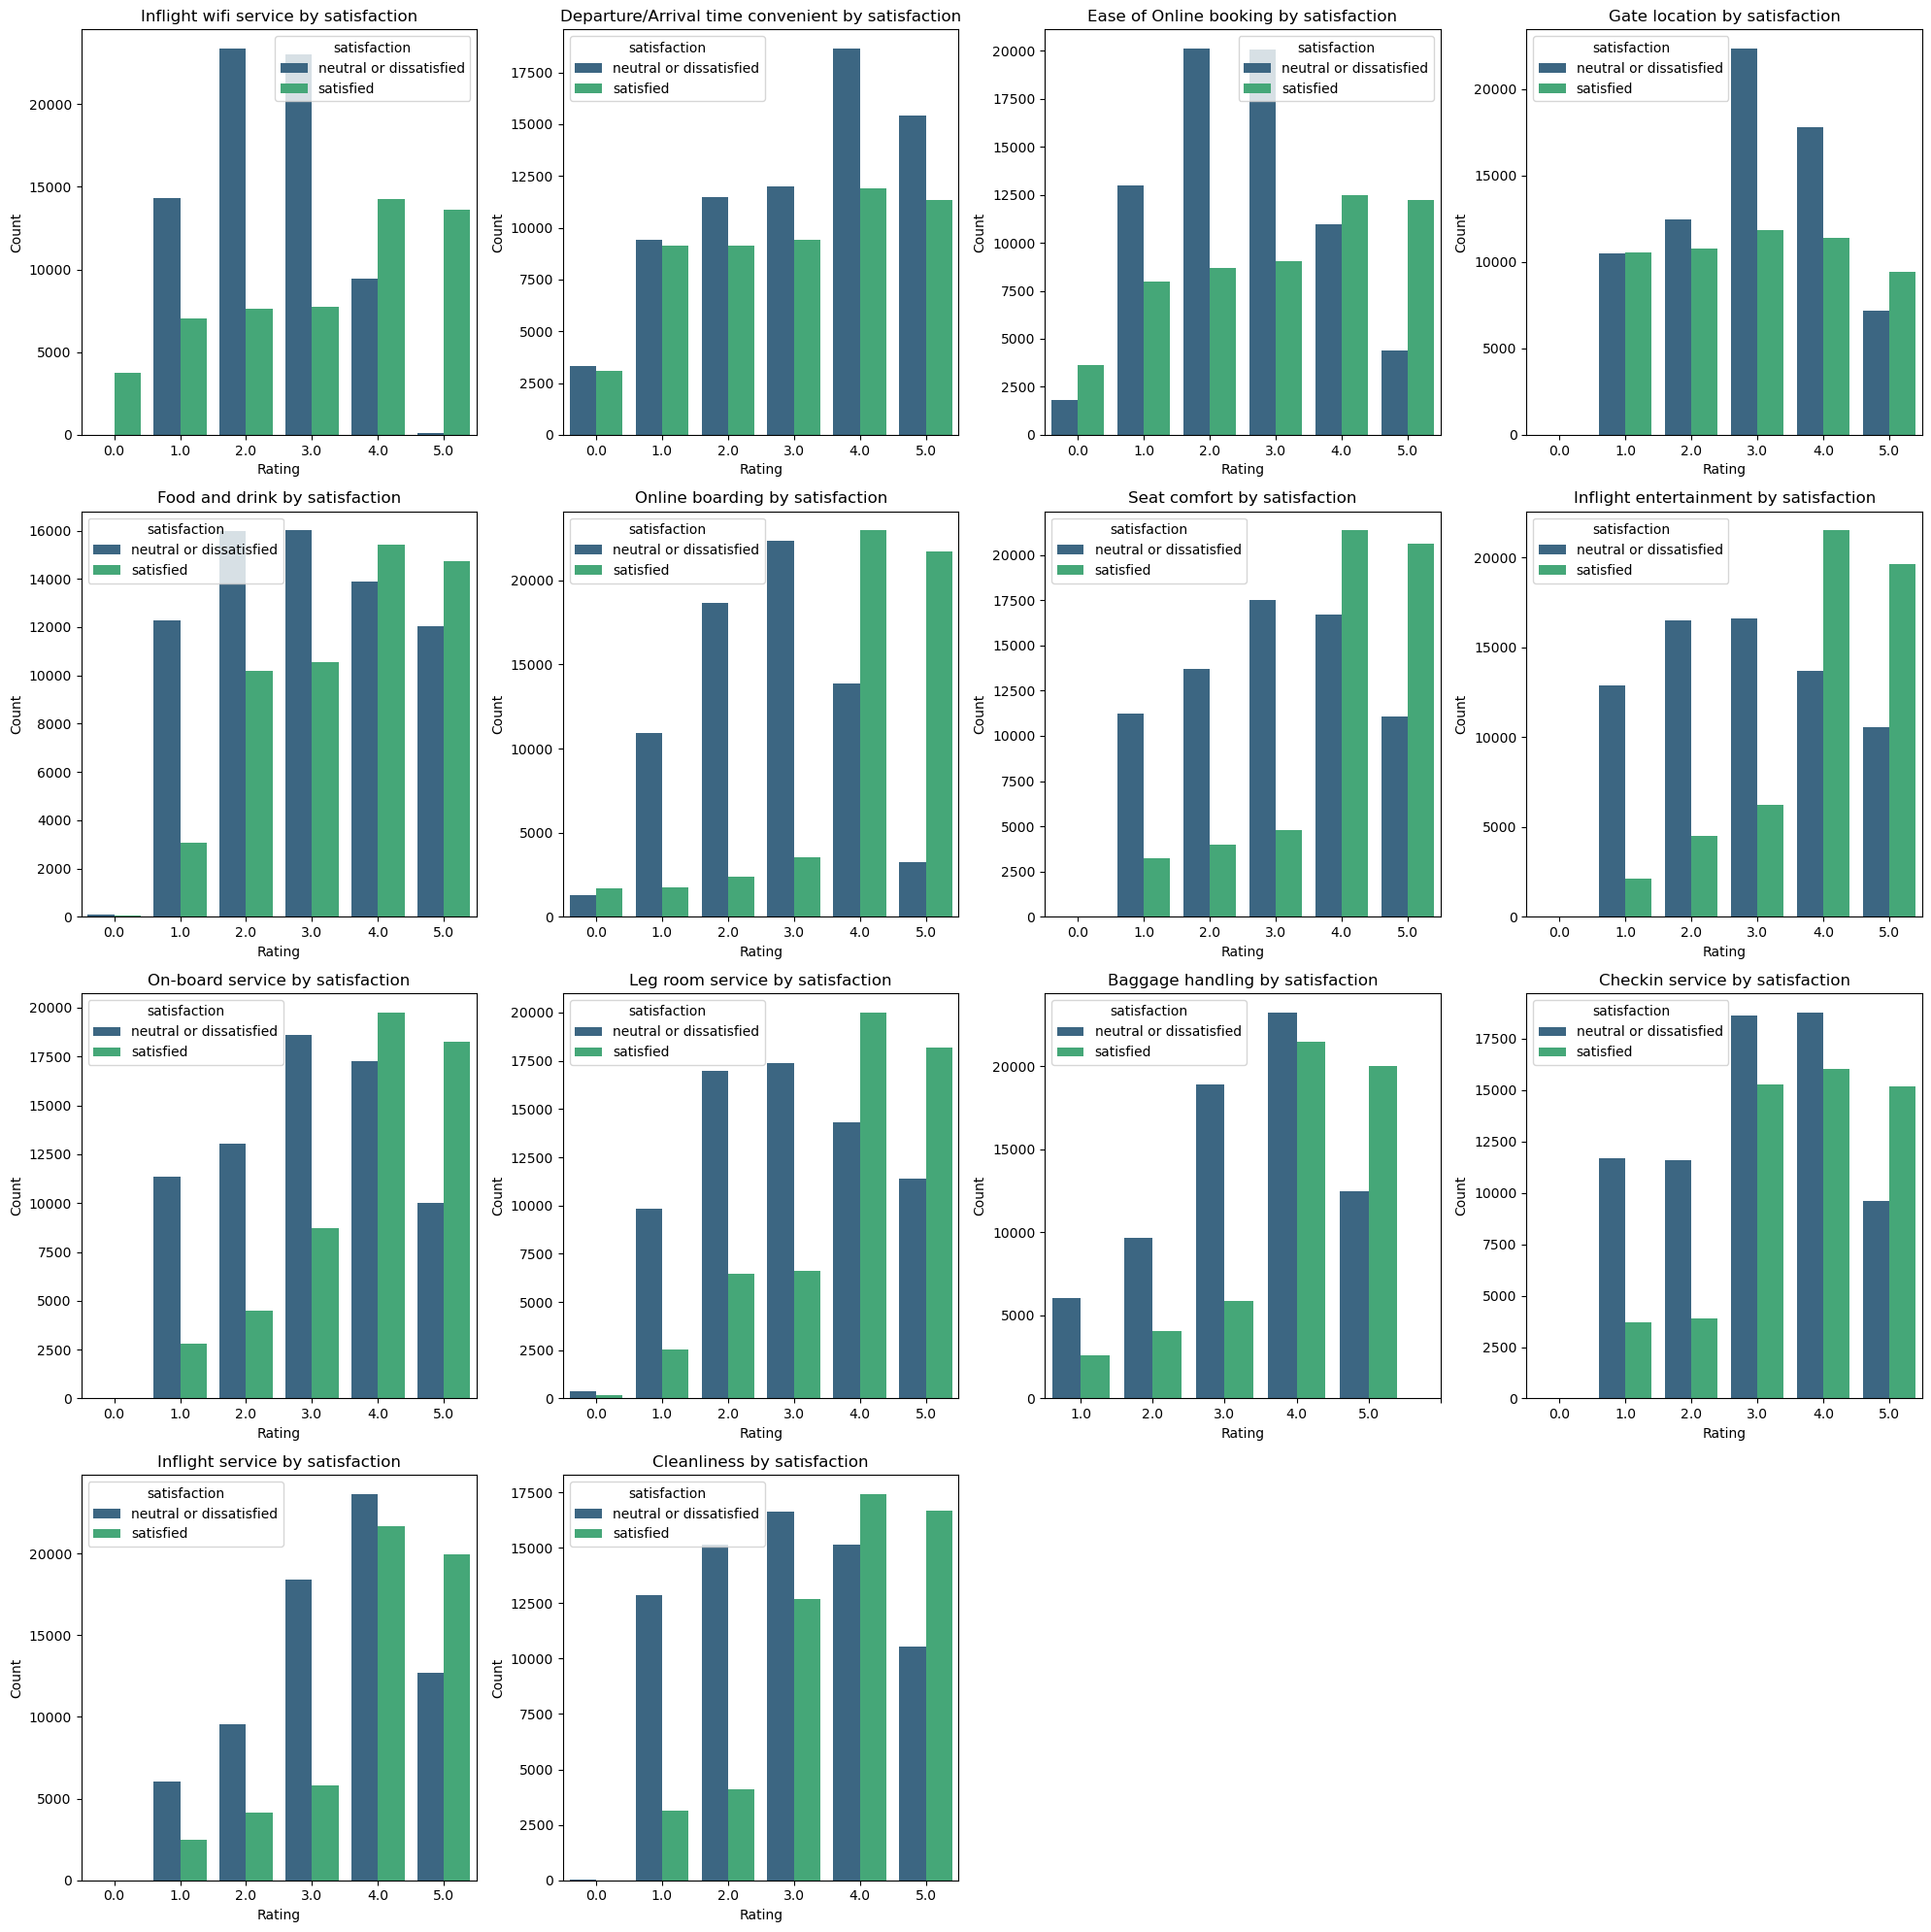

In [10]:
rating_cols = df.columns[8:22]

num_cols = len(rating_cols)
num_rows = (num_cols + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(rating_cols):
    sns.countplot(data=df, x=col, hue='satisfaction', palette="viridis", ax=axes[i])
    axes[i].set_title(f'{col} by satisfaction')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(6))


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Yang dissatisfied cenderung kasih rating yang rendah pada cleanliness, online booking, food and drink, dan inflight wifi service

Yang satisfied cenderung kasih rating yang tinggi pada semua features, kecuali inflight wifi service, gate location, time convenient, dan online booking

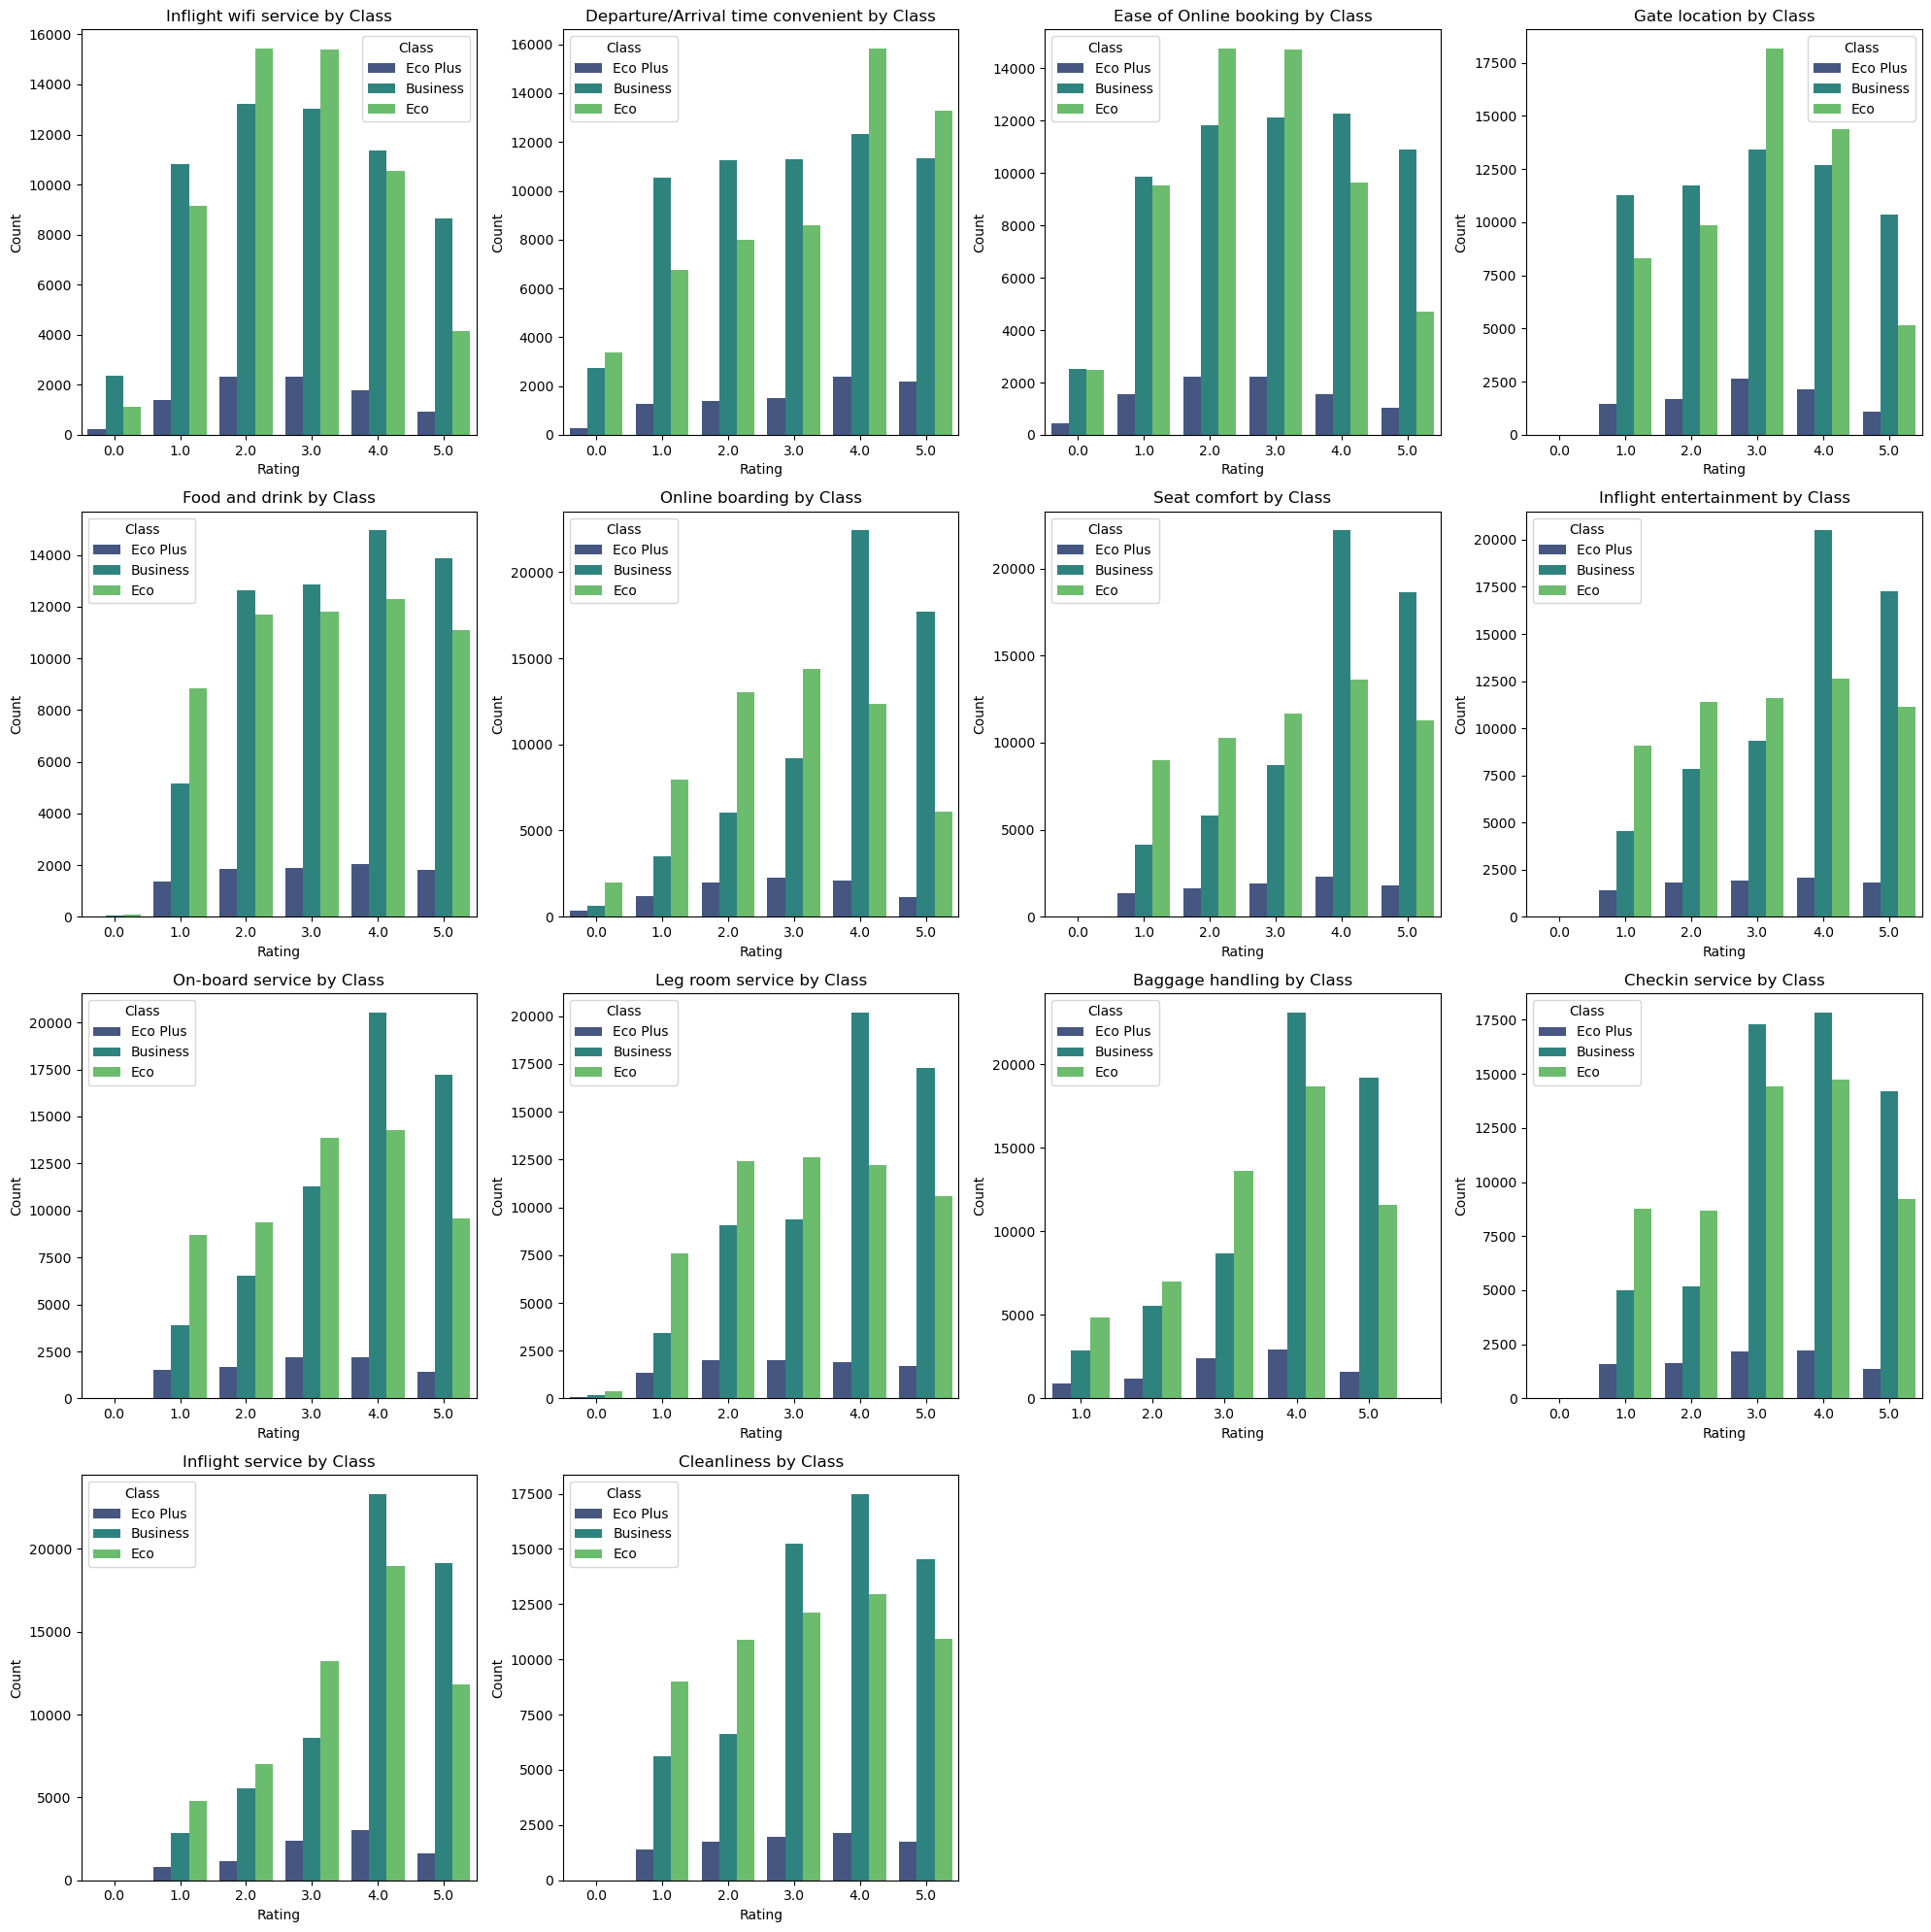

In [11]:
rating_cols = df.columns[8:22] 


num_cols = len(rating_cols)
num_rows = (num_cols + 3) // 4  


fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
axes = axes.flatten() 


for i, col in enumerate(rating_cols):
    sns.countplot(data=df, x=col, hue='Class', palette="viridis", ax=axes[i])
    axes[i].set_title(f'{col} by Class')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(range(6)) 


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Class business lebih banyak kasih rating tinggi dibandingkan class economy

In [12]:
df['Class'].value_counts()

Class
Business    59490
Eco         55809
Eco Plus     9002
Name: count, dtype: int64

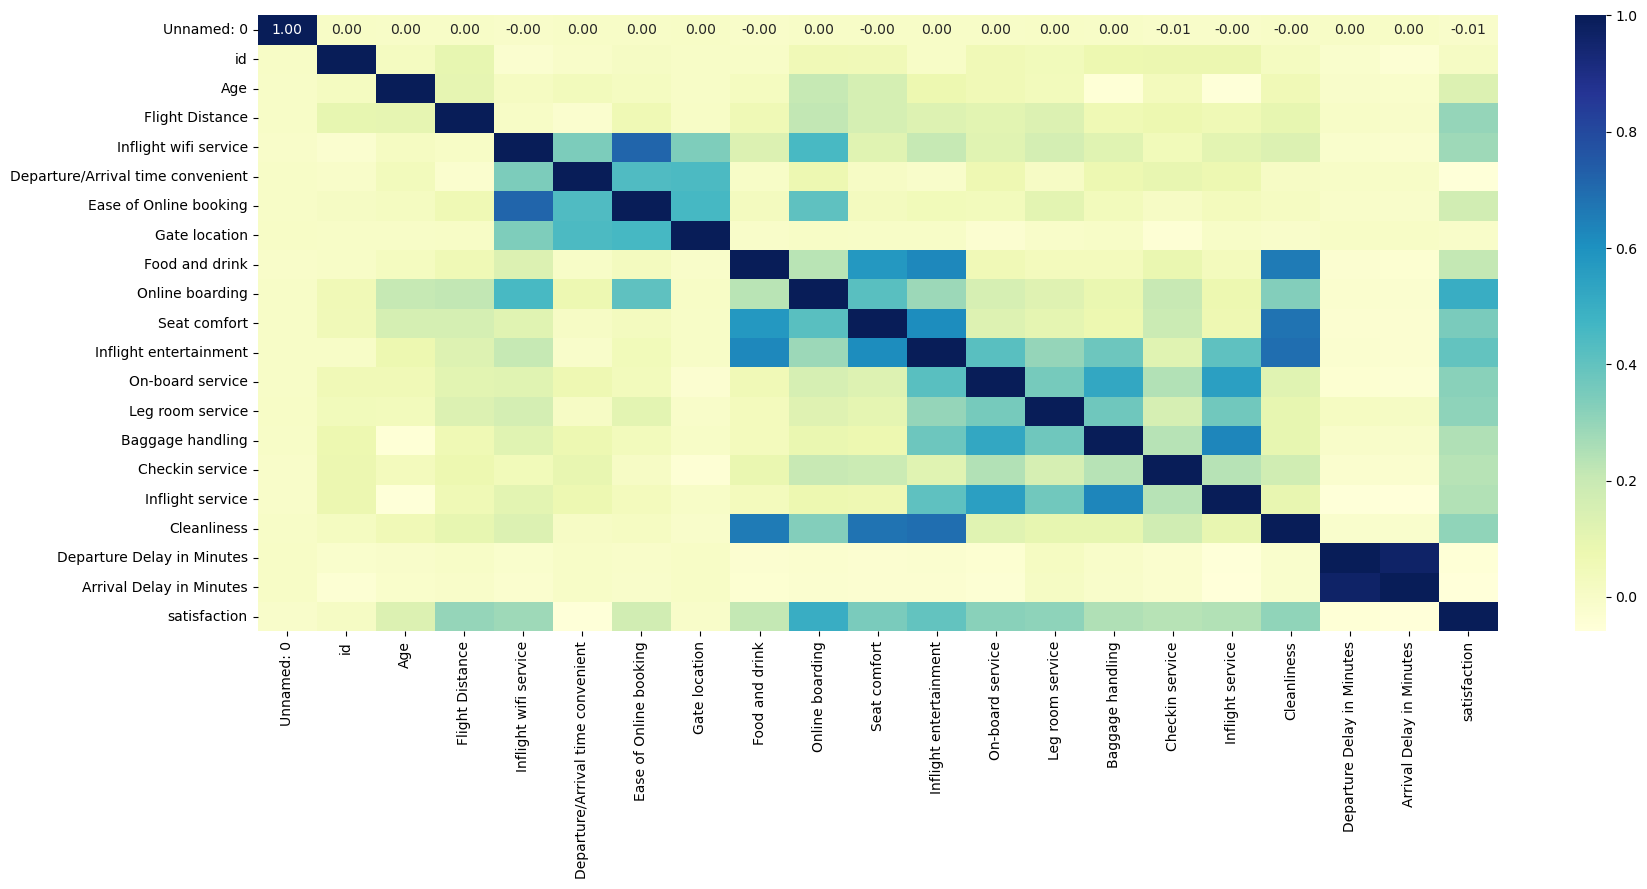

In [13]:
plt.figure(figsize=(20, 8))

df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
num_col = df.select_dtypes(include=np.number)
correlation_matrix = num_col.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

plt.show()

Depature Delay dan Arriving Delay memiliki korelasi hampir 1.

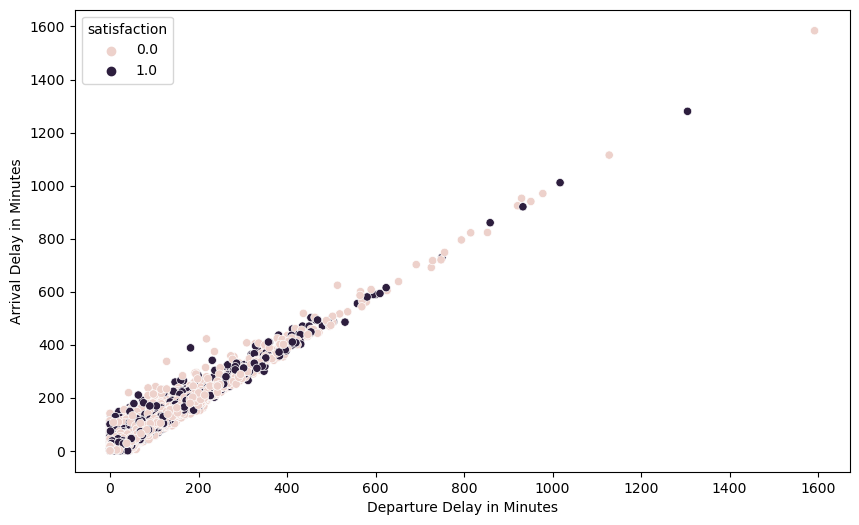

In [14]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', hue='satisfaction', data = df, color = 'teal')
plt.show()

Semua depature delay akan ada jika ada arriving delay, dan nilanya hampir sama untuk semua titik (linear)

Salah satu feature dapat dihapus

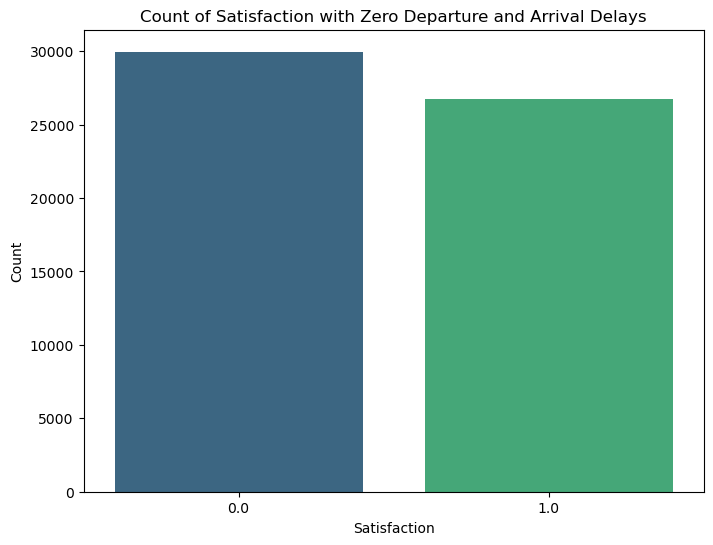

In [15]:
filtered_data = df[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes']==0)]

plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', data=filtered_data, palette='viridis')
plt.title('Count of Satisfaction with Zero Departure and Arrival Delays')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

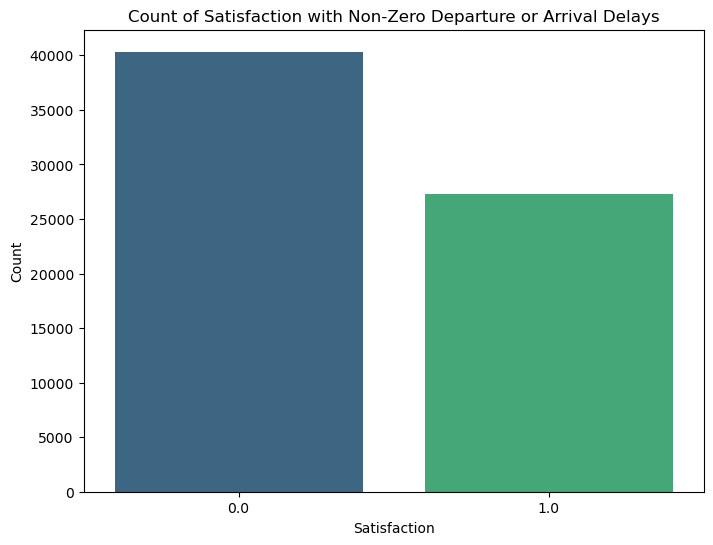

In [16]:
remaining_data = df[~df.index.isin(filtered_data.index)]


plt.figure(figsize=(8, 6))
sns.countplot(x='satisfaction', data=remaining_data, palette='viridis')
plt.title('Count of Satisfaction with Non-Zero Departure or Arrival Delays')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Delay bukan permasalahan utama yang mempengaruhi satisfaction passenger, karena lebih banyak passenger yang tidak satisfied dalam kondisi delay atau tidak.

In [17]:
satisfaction_counts = df['satisfaction'].value_counts()
total_passengers = df.shape[0]
satisfaction_percentage = (satisfaction_counts / total_passengers) * 100

satisfaction_table = pd.DataFrame({
    'Count': satisfaction_counts,
    'Percentage': satisfaction_percentage
})

satisfaction_table = satisfaction_table.sort_index()

satisfaction_table

,Count,Percentage
satisfaction,,
0.0,70287,56.545349
1.0,54014,43.453846


Lebih banyak passenger yang tidak satisfied, 56 : 43.

In [18]:
filtered_data_eco = df[df['Class'] == 'Eco']

counts_eco = {}

for col in rating_cols:
    count = filtered_data_eco[col][filtered_data_eco[col] <= 3].count()
    counts_eco[col] = count
    
counts_table = pd.DataFrame(counts_eco.items(), columns=['Rating Feature', 'Count'])
counts_table_sorted = counts_table.sort_values(by='Count', ascending=False)
counts_table_sorted

,Rating Feature,Count
2,Ease of Online booking,41483
0,Inflight wifi service,41085
5,Online boarding,37361
3,Gate location,36297
9,Leg room service,32996
4,Food and drink,32410
7,Inflight entertainment,32043
13,Cleanliness,31963
8,On-board service,31928
11,Checkin service,31867


In [19]:
filtered_data_bus = df[df['Class'] == 'Business']

counts_bus = {}

for col in rating_cols:
    count = filtered_data_bus[col][filtered_data_bus[col] > 3].count()
    counts_bus[col] = count
    
counts_table = pd.DataFrame(counts_bus.items(), columns=['Rating Feature', 'Count'])
counts_table_sorted = counts_table.sort_values(by='Count', ascending=False)
counts_table_sorted

,Rating Feature,Count
12,Inflight service,42467
10,Baggage handling,42356
6,Seat comfort,40836
5,Online boarding,40096
8,On-board service,37780
7,Inflight entertainment,37736
9,Leg room service,37480
11,Checkin service,32021
13,Cleanliness,32012
4,Food and drink,28819


Keunggulan bisnis adalah pada Inflight Service di kedua class business dan eco.

Kelemahan bisnis adalah pada inflight wifi service dan onlinebooking di kedua class

In [20]:
filtered_data_ecop = df[df['Class'] == 'Eco Plus']

counts_ecop = {}

for col in rating_cols:
    count = filtered_data_ecop[col][filtered_data_ecop[col] <= 3].count()
    counts_ecop[col] = count
    
counts_table = pd.DataFrame(counts_ecop.items(), columns=['Rating Feature', 'Count'])
counts_table_sorted = counts_table.sort_values(by='Count', ascending=False)
counts_table_sorted

,Rating Feature,Count
2,Ease of Online booking,6436
0,Inflight wifi service,6299
3,Gate location,5773
5,Online boarding,5773
11,Checkin service,5402
8,On-board service,5399
9,Leg room service,5397
4,Food and drink,5155
13,Cleanliness,5117
7,Inflight entertainment,5102


In [21]:
class_encoded = pd.get_dummies(df['Class'], prefix='Class')

df_encoded = pd.concat([df, class_encoded], axis=1)

correlation = df_encoded[['Class_Eco', 'Class_Business', 'Class_Eco Plus', 'satisfaction']].corr()

correlation

,Class_Eco,Class_Business,Class_Eco Plus,satisfaction
Class_Eco,1.000000,-0.864815,-0.252223,-0.449256
Class_Business,-0.864815,1.000000,-0.267700,0.502382
Class_Eco Plus,-0.252223,-0.267700,1.000000,-0.106122
satisfaction,-0.449256,0.502382,-0.106122,1.000000


Business membawa korelasi yang positif untuk satisfaction, sedangkan eco dan eco plus memiliki korelasi negatif terhadap satisfaction

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded['Class_LabelEncoded'] = label_encoder.fit_transform(df['Class'])

correlation_label_encoded = df_encoded[['Class_LabelEncoded', 'satisfaction']].corr()

correlation_label_encoded

,Class_LabelEncoded,satisfaction
Class_LabelEncoded,1.000000,-0.448184
satisfaction,-0.448184,1.000000


In [23]:
class_frequency = df['Class'].value_counts(normalize=True)

df_encoded['Class_FrequencyEncoded'] = df['Class'].map(class_frequency)

correlation_frequency_encoded = df_encoded[['Class_FrequencyEncoded', 'satisfaction']].corr()

correlation_frequency_encoded

,Class_FrequencyEncoded,satisfaction
Class_FrequencyEncoded,1.000000,0.173462
satisfaction,0.173462,1.000000


Untuk feature 'Class', lebih baik menggunakan frequency encoding

In [24]:
Ct_counts = df['Customer Type'].value_counts()
total_passengers = df.shape[0]
Ct_percentage = (Ct_counts / total_passengers) * 100

Ct_table = pd.DataFrame({
    'Count': Ct_counts,
    'Percentage': Ct_percentage
})

Ct_table = Ct_table.sort_index()

Ct_table

,Count,Percentage
Customer Type,,
Loyal Customer,101495,81.651944
disloyal Customer,22807,18.348056


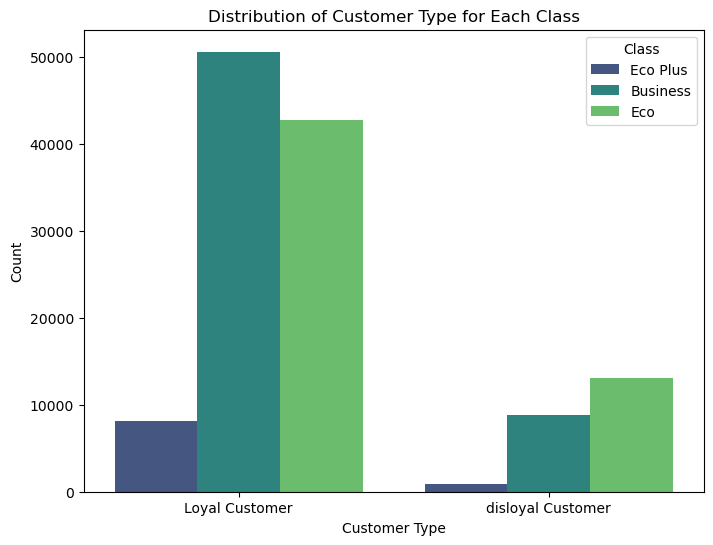

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='Class', data=df, palette='viridis')
plt.title('Distribution of Customer Type for Each Class')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

Loyal Customer banyak memesan business class, disloyal lebih banyak memesan economy class

In [26]:
df['Business_LoyalCustomer'] = (df['Class'] == 'Business') & (df['Customer Type'] == 'Loyal Customer')

correlation_dummy = df[['Business_LoyalCustomer', 'satisfaction']].corr()

correlation_dummy

,Business_LoyalCustomer,satisfaction
Business_LoyalCustomer,1.000000,0.521735
satisfaction,0.521735,1.000000


Passenger yang ambil business dan merupakan loyal customer memiliki korelasi positif terhadap satisfaction

In [27]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    85864
Personal Travel    38437
Business               1
Name: count, dtype: int64

**Preprocessing**: row dengan value 'Business' akan menggantikan valuenya menjadi 'Business Travel'

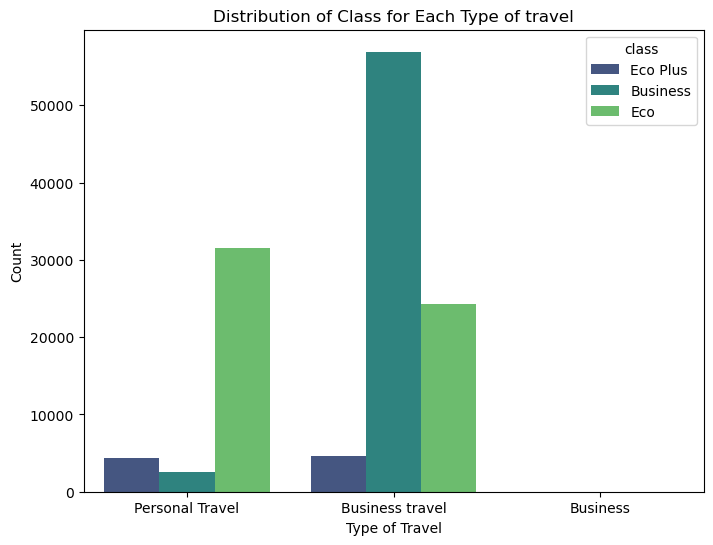

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of Travel', hue='Class', data=df, palette='viridis')
plt.title('Distribution of Class for Each Type of travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='class', loc='upper right')
plt.show()

In [29]:
df['Business_BusinessTravel'] = (df['Class'] == 'Business') & (df['Type of Travel'] == 'Business travel')

correlation_dummy = df[['Business_BusinessTravel', 'satisfaction']].corr()

correlation_dummy

,Business_BusinessTravel,satisfaction
Business_BusinessTravel,1.000000,0.530118
satisfaction,0.530118,1.000000


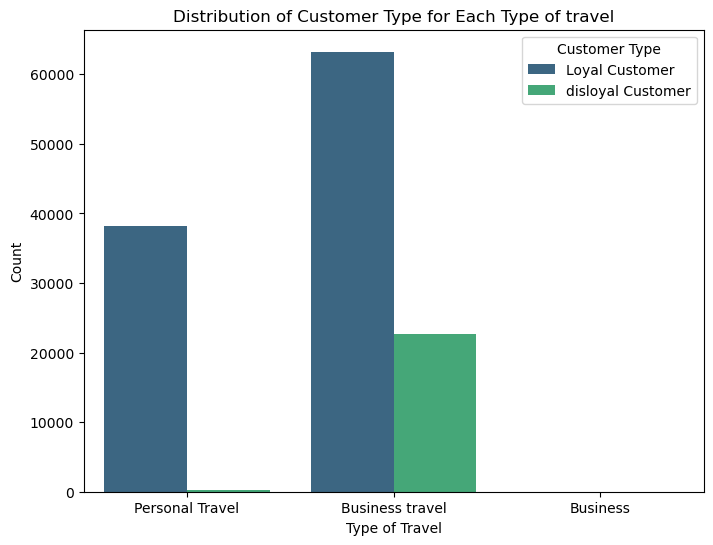

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of Travel', hue='Customer Type', data=df, palette='viridis')
plt.title('Distribution of Customer Type for Each Type of travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Customer Type', loc='upper right')
plt.show()

In [31]:
df['Personal_Loyal'] = (df['Type of Travel'] == 'Personal Travel') & (df['Customer Type'] == 'Loyal Customer')
df['Business_Loyal'] = (df['Type of Travel'] == 'Business travel') & (df['Customer Type'] == 'Loyal Customer')

correlation_dummy = df[['Business_Loyal', 'Personal_Loyal', 'satisfaction']].corr()

correlation_dummy

,Business_Loyal,Personal_Loyal,satisfaction
Business_Loyal,1.000000,-0.678539,0.557843
Personal_Loyal,-0.678539,1.000000,-0.448527
satisfaction,0.557843,-0.448527,1.000000


Penumpang loyal yang travel untuk keperluan bisnis biasanya puas dengan airline

Penumpang yang naik business class untuk tujuan bisnis dalam perjalanan jauh cenderung satisfied 

C:\Users\Ateck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ateck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


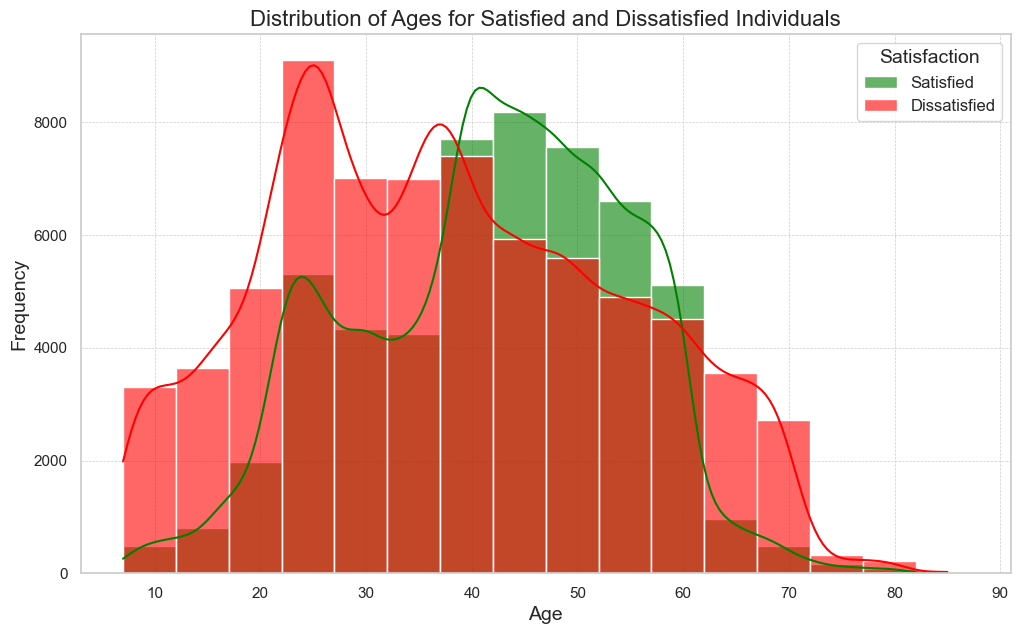

In [32]:
satisfied_ages = df[df['satisfaction'] == 1]['Age']
dissatisfied_ages = df[df['satisfaction'] == 0]['Age']
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

sns.histplot(satisfied_ages, kde=True, color='green', label='Satisfied', binwidth=5, alpha=0.6)
sns.histplot(dissatisfied_ages, kde=True, color='red', label='Dissatisfied', binwidth=5, alpha=0.6)

plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Ages for Satisfied and Dissatisfied Individuals', fontsize=16)
plt.legend(title='Satisfaction', fontsize=12, title_fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Penumpang pada usia 20 awal sampai dengan 40 banyak yang tidak puas

Penumpang pada 40 awal sampai dengan 60 lebih banyak yang puas

**Dapat melakukan pengelompokan usia**

# Preprocessing

In [33]:
df = pd.read_csv('airplane.csv')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124297,25971,78463,Male,disloyal Customer,34,Business travel,Business,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,neutral or dissatisfied
124298,25972,71167,Male,Loyal Customer,23,Business travel,Business,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,satisfied
124299,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,neutral or dissatisfied
124300,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,satisfied


Load ulang dataset karena sudah diotak-atik di EDA

In [34]:
df['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [35]:
df.drop(index=98325, inplace=True)

In [36]:
df['Type of Travel'] = df['Type of Travel'].replace('Business', 'Business Travel')

In [37]:
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='id', inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124301 entries, 0 to 124301
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             124301 non-null  object 
 1   Customer Type                      124301 non-null  object 
 2   Age                                124301 non-null  int64  
 3   Type of Travel                     124301 non-null  object 
 4   Class                              124301 non-null  object 
 5   Flight Distance                    124301 non-null  float64
 6   Inflight wifi service              124301 non-null  float64
 7   Departure/Arrival time convenient  124301 non-null  float64
 8   Ease of Online booking             124301 non-null  float64
 9   Gate location                      124301 non-null  float64
 10  Food and drink                     124301 non-null  float64
 11  Online boarding                    124301 no

Sudah tidak ada missing value

### Feature Engineering (Horizontal) -> Extraction

In [39]:
rating_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

df['average_rating'] = df[rating_columns].mean(axis=1)

In [40]:
onplane_ratings = ['Inflight wifi service', 'Food and drink', 'Online boarding', 'Inflight entertainment',
                    'On-board service', 'Inflight service', 'Seat comfort', 'Leg room service', 'Cleanliness']
offplane_ratings = ['Departure/Arrival time convenient', 'Gate location', 'Baggage handling', 'Ease of Online booking',
                     'Checkin service']

df['Onplane_average'] = df[onplane_ratings].mean(axis=1)
df['Offplane_average'] = df[offplane_ratings].mean(axis=1)

In [41]:
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior Adult', 'Senior']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [42]:
service_features = ['Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Inflight entertainment',
                    'On-board service', 'Checkin service', 'Inflight service']
logistics_features = ['Departure/Arrival time convenient', 'Gate location', 'Baggage handling']
comfort_features = ['Seat comfort', 'Leg room service', 'Cleanliness']

df['Service_Average'] = df[service_features].mean(axis=1)
df['Logistics_Average'] = df[logistics_features].mean(axis=1)
df['Comfort_Average'] = df[comfort_features].mean(axis=1)


## Splitting

In [43]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering (Vertical)

In [44]:
y_train.replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)
y_test.replace({'neutral or dissatisfied': 0, 'satisfied': 1}, inplace=True)

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['Class_label'] = label_encoder.fit_transform(X_train['Class'])
X_test['Class_label'] = label_encoder.transform(X_test['Class'])
print("Class_label:")
print(label_encoder.classes_)

X_train['Type of Travel_label'] = label_encoder.fit_transform(X_train['Type of Travel'])
X_test['Type of Travel_label'] = label_encoder.transform(X_test['Type of Travel'])
print("\nType of Travel_label:")
print(label_encoder.classes_)

X_train['Customer Type_label'] = label_encoder.fit_transform(X_train['Customer Type'])
X_test['Customer Type_label'] = label_encoder.transform(X_test['Customer Type'])
print("\nCustomer Type_label:")
print(label_encoder.classes_)

X_train['Gender_label'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender_label'] = label_encoder.transform(X_test['Gender'])
print("\nGender_label:")
print(label_encoder.classes_)


Class_label:
['Business' 'Eco' 'Eco Plus']

Type of Travel_label:
['Business travel' 'Personal Travel']

Customer Type_label:
['Loyal Customer' 'disloyal Customer']

Gender_label:
['Female' 'Male']


In [46]:
freq_age_category_train = X_train['Age_Category'].value_counts(normalize=True)
X_train['Age_cat_freq_encode'] = X_train['Age_Category'].map(freq_age_category_train)

freq_age_category_test = X_test['Age_Category'].value_counts(normalize=True)
X_test['Age_cat_freq_encode'] = X_test['Age_Category'].map(freq_age_category_test)

In [47]:
X_train['Age_cat_freq_encode'].unique()

[0.525080, 0.295736, 0.094107, 0.054244, 0.030833]
Categories (5, float64): [0.030833 < 0.054244 < 0.295736 < 0.525080 < 0.094107]

In [48]:
freq_category_train = X_train['Class'].value_counts(normalize=True)
X_train['Class_freq_encode'] = X_train['Class'].map(freq_category_train)

freq_category_test = X_test['Class'].value_counts(normalize=True)
X_test['Class_freq_encode'] = X_test['Class'].map(freq_category_test)

In [49]:
X_train['Class_freq_encode'].unique()

array([0.47682019, 0.45018101, 0.07299879])

In [50]:
X_train.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,average_rating,Onplane_average,Offplane_average,Age_Category,Service_Average,Logistics_Average,Comfort_Average,Class_label,Type of Travel_label,Customer Type_label,Gender_label,Age_cat_freq_encode,Class_freq_encode
105650,Female,Loyal Customer,44,Business travel,Business,1757.0,2.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,5.0,25.0,2.571429,2.333333,3.0,Senior Adult,2.875,2.666667,1.666667,0,0,0,0,0.525080,0.476820
114697,Male,Loyal Customer,23,Business travel,Business,1384.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,5.0,3.0,3.0,4.0,0.0,6.0,3.857143,3.777778,4.0,Adult,3.500,4.333333,4.333333,0,0,0,1,0.295736,0.476820
30295,Male,disloyal Customer,41,Business travel,Business,714.0,4.0,3.0,3.0,3.0,5.0,4.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,10.0,5.0,4.071429,4.444444,3.4,Senior Adult,4.250,3.333333,4.333333,0,0,1,1,0.525080,0.476820
59858,Female,Loyal Customer,52,Personal Travel,Eco Plus,200.0,4.0,4.0,0.0,4.0,5.0,5.0,3.0,4.0,4.0,0.0,5.0,3.0,4.0,5.0,0.0,0.0,3.571429,3.777778,3.2,Senior Adult,3.625,4.333333,2.666667,2,1,0,0,0.525080,0.072999
55347,Female,Loyal Customer,48,Personal Travel,Eco,829.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,6.0,16.0,3.642857,3.777778,3.4,Senior Adult,3.875,3.000000,3.666667,1,1,0,0,0.525080,0.450181
123686,Female,Loyal Customer,9,Personal Travel,Eco,1746.0,0.0,1.0,0.0,2.0,3.0,0.0,5.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,0.0,0.0,1.857143,2.111111,1.4,Child,1.625,1.333333,3.000000,1,1,0,0,0.030833,0.450181
112232,Female,Loyal Customer,39,Business travel,Eco Plus,230.0,4.0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,0.0,0.0,3.428571,4.000000,2.4,Senior Adult,3.750,2.000000,4.000000,2,0,0,0,0.525080,0.072999
24498,Male,Loyal Customer,41,Personal Travel,Eco,351.0,5.0,5.0,5.0,3.0,3.0,5.0,2.0,3.0,3.0,3.0,5.0,3.0,5.0,3.0,0.0,0.0,3.785714,3.555556,4.2,Senior Adult,4.000,4.333333,2.666667,1,1,0,1,0.525080,0.450181
38913,Male,Loyal Customer,54,Business travel,Eco,1703.0,3.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,49.0,74.0,3.928571,3.777778,4.2,Senior Adult,3.750,4.333333,4.000000,1,0,0,1,0.525080,0.450181
40563,Male,Loyal Customer,54,Business travel,Business,2942.0,1.0,1.0,3.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,0.0,0.0,3.571429,4.000000,2.8,Senior Adult,3.750,2.000000,4.666667,0,0,0,1,0.525080,0.476820


In [51]:
X_train.drop(columns=['Class', 'Gender', 'Customer Type', 'Type of Travel', 'Age_Category'], inplace=True)
X_test.drop(columns=['Class', 'Gender', 'Customer Type', 'Type of Travel', 'Age_Category'], inplace=True)

In [52]:
X_train['Age_cat_freq_encode'] = X_train['Age_cat_freq_encode'].astype(float)
X_test['Age_cat_freq_encode'] = X_test['Age_cat_freq_encode'].astype(float)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99440 entries, 30599 to 121959
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                99440 non-null  int64  
 1   Flight Distance                    99440 non-null  float64
 2   Inflight wifi service              99440 non-null  float64
 3   Departure/Arrival time convenient  99440 non-null  float64
 4   Ease of Online booking             99440 non-null  float64
 5   Gate location                      99440 non-null  float64
 6   Food and drink                     99440 non-null  float64
 7   Online boarding                    99440 non-null  float64
 8   Seat comfort                       99440 non-null  float64
 9   Inflight entertainment             99440 non-null  float64
 10  On-board service                   99440 non-null  float64
 11  Leg room service                   99440 non-null  flo

Semua feature dalam bentuk numerical

## Feature Selection

C:\Users\Ateck\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


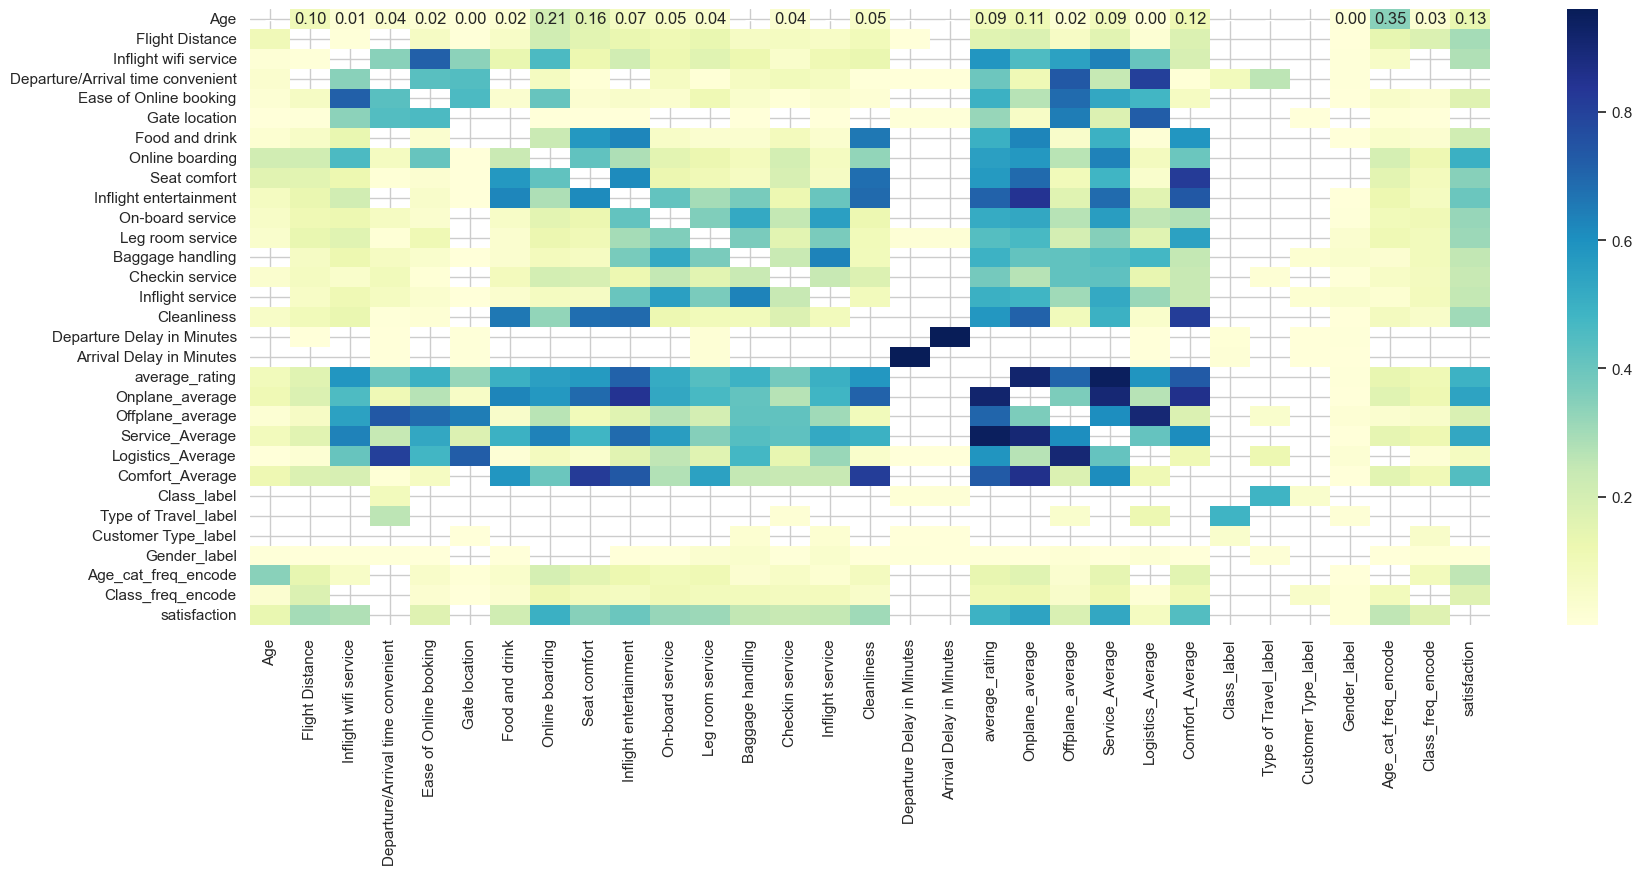

In [54]:
plt.figure(figsize=(20, 8))

X_train_with_y = pd.concat([X_train, y_train], axis=1)

num_bool_col = X_train_with_y.select_dtypes(include=[np.number, bool])
correlation_matrix = num_bool_col.corr()

filtered_correlation_matrix = correlation_matrix[(correlation_matrix > 0) & (correlation_matrix < 1.0)]

sns.heatmap(filtered_correlation_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

plt.show()

#### RFE with Decision Tree

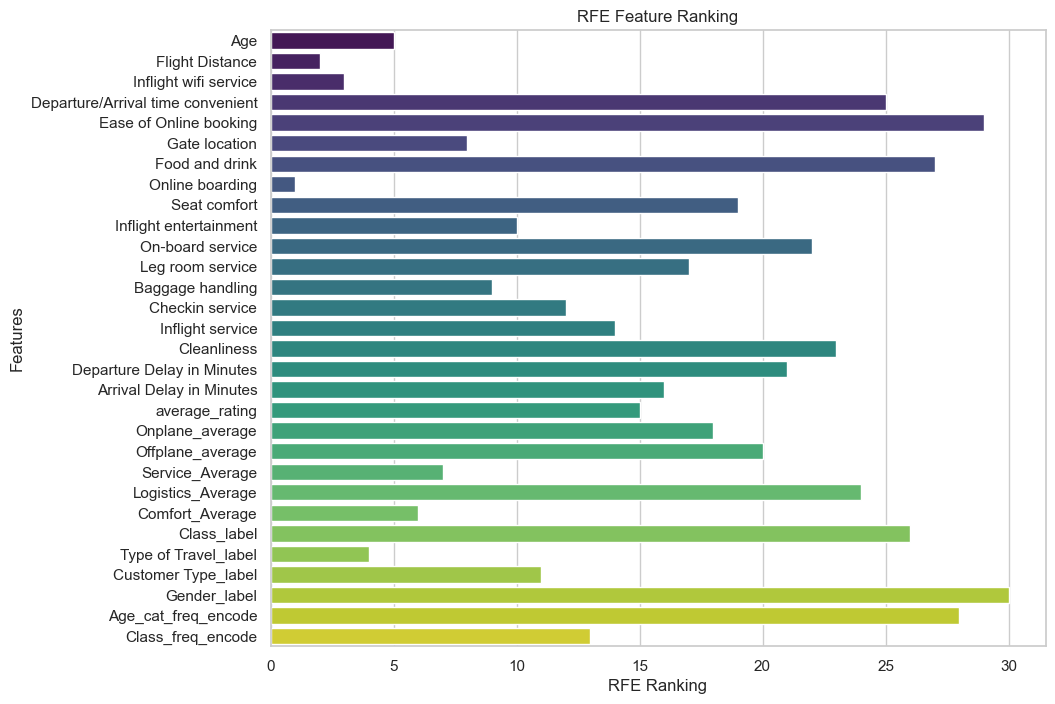

RFE Rankings:
Age                                   5
Flight Distance                       2
Inflight wifi service                 3
Departure/Arrival time convenient    25
Ease of Online booking               29
Gate location                         8
Food and drink                       27
Online boarding                       1
Seat comfort                         19
Inflight entertainment               10
On-board service                     22
Leg room service                     17
Baggage handling                      9
Checkin service                      12
Inflight service                     14
Cleanliness                          23
Departure Delay in Minutes           21
Arrival Delay in Minutes             16
average_rating                       15
Onplane_average                      18
Offplane_average                     20
Service_Average                       7
Logistics_Average                    24
Comfort_Average                       6
Class_label               

In [55]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

rfe = RFE(estimator=dt_clf, n_features_to_select=1) 
rfe.fit(X_train, y_train)

rfe_ranking = pd.Series(rfe.ranking_, index=X_train.columns)

plt.figure(figsize=(10, 8))
sns.barplot(x=rfe_ranking, y=rfe_ranking.index, palette='viridis')
plt.xlabel('RFE Ranking')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.show()

print("RFE Rankings:")
print(rfe_ranking)


In [56]:
top_15_features = rfe_ranking.sort_values().index[:15].tolist()
print("Top 15 Features based on RFE ranking:")
print(top_15_features)

Top 15 Features based on RFE ranking:
['Online boarding', 'Flight Distance', 'Inflight wifi service', 'Type of Travel_label', 'Age', 'Comfort_Average', 'Service_Average', 'Gate location', 'Baggage handling', 'Inflight entertainment', 'Customer Type_label', 'Checkin service', 'Class_freq_encode', 'Inflight service', 'average_rating']


In [57]:
filtered = ['Online boarding', 'Flight Distance', 'Inflight wifi service', 
            'Type of Travel_label', 'Comfort_Average', 'Age', 'Service_Average', 
            'Inflight entertainment', 'Baggage handling', 'Customer Type_label', 
            'Checkin service', 'Gate location', 'Class_freq_encode', 'Inflight service', 'average_rating']

#### RFE with Random Forest

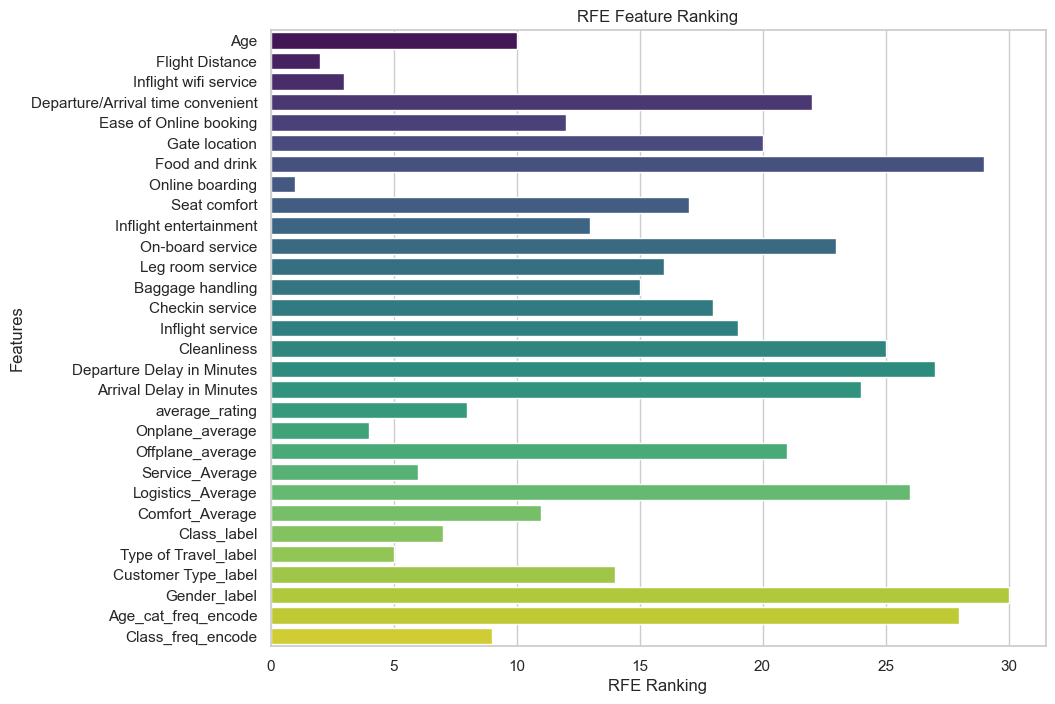

RFE Rankings:
Age                                  10
Flight Distance                       2
Inflight wifi service                 3
Departure/Arrival time convenient    22
Ease of Online booking               12
Gate location                        20
Food and drink                       29
Online boarding                       1
Seat comfort                         17
Inflight entertainment               13
On-board service                     23
Leg room service                     16
Baggage handling                     15
Checkin service                      18
Inflight service                     19
Cleanliness                          25
Departure Delay in Minutes           27
Arrival Delay in Minutes             24
average_rating                        8
Onplane_average                       4
Offplane_average                     21
Service_Average                       6
Logistics_Average                    26
Comfort_Average                      11
Class_label               

In [58]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rfe = RFE(estimator=rf_clf, n_features_to_select=1) 
rfe.fit(X_train, y_train)

rfe_ranking_rf = pd.Series(rfe.ranking_, index=X_train.columns)

plt.figure(figsize=(10, 8))
sns.barplot(x=rfe_ranking_rf, y=rfe_ranking.index, palette='viridis')
plt.xlabel('RFE Ranking')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.show()

print("RFE Rankings:")
print(rfe_ranking_rf)


In [59]:
top_15_features_rf = rfe_ranking_rf.sort_values().index[:15].tolist()
print("Top 15 Features based on RFE ranking:")
print(top_15_features_rf)

Top 15 Features based on RFE ranking:
['Online boarding', 'Flight Distance', 'Inflight wifi service', 'Onplane_average', 'Type of Travel_label', 'Service_Average', 'Class_label', 'average_rating', 'Class_freq_encode', 'Age', 'Comfort_Average', 'Ease of Online booking', 'Inflight entertainment', 'Customer Type_label', 'Baggage handling']


In [60]:
filtered_rf = ['Online boarding', 'Flight Distance', 'Inflight wifi service', 
               'Onplane_average', 'Class_label', 'Service_Average', 'Type of Travel_label', 'Age', 
               'Class_freq_encode', 'Comfort_Average', 'average_rating', 'Ease of Online booking', 
               'Inflight entertainment', 'Leg room service', 'Customer Type_label']

## Scaling

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[filtered])

X_test_scaled = scaler.transform(X_test[filtered])

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaledrf = scaler.fit_transform(X_train[filtered_rf])

X_test_scaledrf = scaler.transform(X_test[filtered_rf])

## Modeling

### Modeling with RFE_dt features

In [63]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

def eval_classification(model, x_tra, x_tes, y_tra, y_tes, thres):
    y_pred_train = model.predict(x_tra)
    y_pred_proba_train = model.predict_proba(x_tra)
    
    y_pred_proba = model.predict_proba(x_tes)
    
    threshold = thres
    y_pred = (y_pred_proba[:, 1] >= threshold).astype('int')
    
    print(classification_report(y_tes, y_pred))
    
    print("Accuracy (Test Set): %.6f" % accuracy_score(y_tes, y_pred))
    print("Precission (Test Set): %.6f" % precision_score(y_tes, y_pred))
    print("Recall (Test Set): %.6f" % recall_score(y_tes, y_pred))
    print("F1-Score (Test Set): %.6f" % f1_score(y_tes, y_pred))
    print("roc_auc (test-proba): %.6f" % roc_auc_score(y_tes, y_pred_proba[:,1]))
    print("roc_auc (Train-proba): %.6f" % roc_auc_score(y_tra, y_pred_proba_train[:,1]))
    
    print(f"Confusion Matrix: \n {confusion_matrix(y_tes, y_pred)}\n")

#### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

eval_classification(lr, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     13878
           1       0.87      0.83      0.85     10983

    accuracy                           0.87     24861
   macro avg       0.87      0.87      0.87     24861
weighted avg       0.87      0.87      0.87     24861

Accuracy (Test Set): 0.870359
Precission (Test Set): 0.869032
Recall (Test Set): 0.831922
F1-Score (Test Set): 0.850072
roc_auc (test-proba): 0.925018
roc_auc (Train-proba): 0.922048
Confusion Matrix: 
 [[12501  1377]
 [ 1846  9137]]



#### Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)

y_pred = gnb.predict(X_test_scaled)

eval_classification(gnb, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     13878
           1       0.85      0.82      0.83     10983

    accuracy                           0.86     24861
   macro avg       0.85      0.85      0.85     24861
weighted avg       0.86      0.86      0.86     24861

Accuracy (Test Set): 0.855517
Precission (Test Set): 0.849655
Recall (Test Set): 0.817627
F1-Score (Test Set): 0.833333
roc_auc (test-proba): 0.914590
roc_auc (Train-proba): 0.912586
Confusion Matrix: 
 [[12289  1589]
 [ 2003  8980]]



#### KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

eval_classification(knn, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     13878
           1       0.95      0.90      0.93     10983

    accuracy                           0.94     24861
   macro avg       0.94      0.93      0.93     24861
weighted avg       0.94      0.94      0.94     24861

Accuracy (Test Set): 0.936125
Precission (Test Set): 0.954876
Recall (Test Set): 0.897842
F1-Score (Test Set): 0.925481
roc_auc (test-proba): 0.975284
roc_auc (Train-proba): 0.994301
Confusion Matrix: 
 [[13412   466]
 [ 1122  9861]]



#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_scaled, y_train)

eval_classification(dt, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13878
           1       0.94      0.94      0.94     10983

    accuracy                           0.95     24861
   macro avg       0.94      0.94      0.94     24861
weighted avg       0.95      0.95      0.95     24861

Accuracy (Test Set): 0.945175
Precission (Test Set): 0.936400
Recall (Test Set): 0.939725
F1-Score (Test Set): 0.938060
roc_auc (test-proba): 0.944607
roc_auc (Train-proba): 1.000000
Confusion Matrix: 
 [[13177   701]
 [  662 10321]]



#### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

eval_classification(rf, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     13878
           1       0.97      0.94      0.95     10983

    accuracy                           0.96     24861
   macro avg       0.96      0.96      0.96     24861
weighted avg       0.96      0.96      0.96     24861

Accuracy (Test Set): 0.959495
Precission (Test Set): 0.969857
Recall (Test Set): 0.937449
F1-Score (Test Set): 0.953377
roc_auc (test-proba): 0.993015
roc_auc (Train-proba): 1.000000
Confusion Matrix: 
 [[13558   320]
 [  687 10296]]



In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [
    ("Logistic Regression", lr),
    ("Naive Bayes", gnb),
    ("Random Forest", rf),
    ("Decision Tree", dt),
    ("K-Nearest Neighbor", knn)
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_test_scores = []
roc_auc_train_scores = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    if hasattr(model, "predict_proba"):
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
    else:
        roc_auc_test = roc_auc_score(y_test, model.decision_function(X_test_scaled))
        roc_auc_train = roc_auc_score(y_train, model.decision_function(X_train_scaled))
    
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_test_scores.append(roc_auc_test)
    roc_auc_train_scores.append(roc_auc_train)


metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC AUC (Test)": roc_auc_test_scores,
    "ROC AUC (Train)": roc_auc_train_scores
})

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train)
0,Logistic Regression,0.870359,0.869032,0.831922,0.850072,0.925018,0.922048
1,Naive Bayes,0.855517,0.849655,0.817627,0.833333,0.914590,0.912586
2,Random Forest,0.959414,0.971183,0.935901,0.953216,0.993015,1.000000
3,Decision Tree,0.945175,0.936400,0.939725,0.938060,0.944607,1.000000
4,K-Nearest Neighbor,0.936125,0.954876,0.897842,0.925481,0.975284,0.994301


### Modeling with RFE_rf features

#### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()

lr2.fit(X_train_scaledrf, y_train)

y_pred = lr2.predict(X_test_scaledrf)

eval_classification(lr2, X_train_scaledrf, X_test_scaledrf, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     13878
           1       0.87      0.84      0.85     10983

    accuracy                           0.87     24861
   macro avg       0.87      0.87      0.87     24861
weighted avg       0.87      0.87      0.87     24861

Accuracy (Test Set): 0.873255
Precission (Test Set): 0.871396
Recall (Test Set): 0.836566
F1-Score (Test Set): 0.853626
roc_auc (test-proba): 0.925370
roc_auc (Train-proba): 0.923298
Confusion Matrix: 
 [[12522  1356]
 [ 1795  9188]]



#### Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()

gnb2.fit(X_train_scaledrf, y_train)

y_pred = gnb2.predict(X_test_scaledrf)

eval_classification(gnb2, X_train_scaledrf, X_test_scaledrf, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     13878
           1       0.84      0.83      0.83     10983

    accuracy                           0.85     24861
   macro avg       0.85      0.85      0.85     24861
weighted avg       0.85      0.85      0.85     24861

Accuracy (Test Set): 0.852983
Precission (Test Set): 0.839448
Recall (Test Set): 0.825002
F1-Score (Test Set): 0.832162
roc_auc (test-proba): 0.913399
roc_auc (Train-proba): 0.911677
Confusion Matrix: 
 [[12145  1733]
 [ 1922  9061]]



#### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train_scaledrf, y_train)

y_pred = knn2.predict(X_test_scaledrf)

eval_classification(knn2, X_train_scaledrf, X_test_scaledrf, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13878
           1       0.95      0.92      0.93     10983

    accuracy                           0.94     24861
   macro avg       0.94      0.94      0.94     24861
weighted avg       0.94      0.94      0.94     24861

Accuracy (Test Set): 0.939785
Precission (Test Set): 0.945938
Recall (Test Set): 0.916052
F1-Score (Test Set): 0.930755
roc_auc (test-proba): 0.976246
roc_auc (Train-proba): 0.993520
Confusion Matrix: 
 [[13303   575]
 [  922 10061]]



#### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier(random_state=42)

dt2.fit(X_train_scaledrf, y_train)

eval_classification(dt2, X_train_scaledrf, X_test_scaledrf, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     13878
           1       0.92      0.92      0.92     10983

    accuracy                           0.93     24861
   macro avg       0.93      0.93      0.93     24861
weighted avg       0.93      0.93      0.93     24861

Accuracy (Test Set): 0.931057
Precission (Test Set): 0.922355
Recall (Test Set): 0.921515
F1-Score (Test Set): 0.921935
roc_auc (test-proba): 0.930061
roc_auc (Train-proba): 1.000000
Confusion Matrix: 
 [[13026   852]
 [  862 10121]]



#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(random_state=42)

rf2.fit(X_train_scaledrf, y_train)

y_pred = rf2.predict(X_test_scaledrf)

eval_classification(rf2, X_train_scaledrf, X_test_scaledrf, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13878
           1       0.96      0.93      0.95     10983

    accuracy                           0.95     24861
   macro avg       0.95      0.95      0.95     24861
weighted avg       0.95      0.95      0.95     24861

Accuracy (Test Set): 0.952295
Precission (Test Set): 0.957761
Recall (Test Set): 0.933169
F1-Score (Test Set): 0.945305
roc_auc (test-proba): 0.990802
roc_auc (Train-proba): 1.000000
Confusion Matrix: 
 [[13426   452]
 [  734 10249]]



In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [
    ("Logistic Regression", lr2),
    ("Naive Bayes", gnb2),
    ("Random Forest", rf2),
    ("Decision Tree", dt2),
    ("K-Nearest Neighbor", knn2)
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_test_scores = []
roc_auc_train_scores = []

for name, model in models:
    model.fit(X_train_scaledrf, y_train)
    
    y_pred_test = model.predict(X_test_scaledrf)
    y_pred_train = model.predict(X_train_scaledrf)
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    if hasattr(model, "predict_proba"):
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaledrf)[:, 1])
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_scaledrf)[:, 1])
    else:
        roc_auc_test = roc_auc_score(y_test, model.decision_function(X_test_scaledrf))
        roc_auc_train = roc_auc_score(y_train, model.decision_function(X_train_scaledrf))
    
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_test_scores.append(roc_auc_test)
    roc_auc_train_scores.append(roc_auc_train)

metrics_df2 = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC AUC (Test)": roc_auc_test_scores,
    "ROC AUC (Train)": roc_auc_train_scores
})

metrics_df2


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train)
0,Logistic Regression,0.873255,0.871396,0.836566,0.853626,0.925370,0.923298
1,Naive Bayes,0.852983,0.839448,0.825002,0.832162,0.913399,0.911677
2,Random Forest,0.952094,0.958599,0.931804,0.945011,0.990802,1.000000
3,Decision Tree,0.931057,0.922355,0.921515,0.921935,0.930061,1.000000
4,K-Nearest Neighbor,0.939785,0.945938,0.916052,0.930755,0.976246,0.993520


### Comparison

In [76]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score


models_dt_rfe = [
    ("Logistic Regression", lr),
    ("Naive Bayes", gnb),
    ("Random Forest", rf),
    ("Decision Tree", dt),
    ("K-Nearest Neighbor", knn)
]

models_rf_rfe = [
    ("Logistic Regression", lr2),
    ("Naive Bayes", gnb2),
    ("Random Forest", rf2),
    ("Decision Tree", dt2),
    ("K-Nearest Neighbor", knn2)
]

dt_model_names = []
dt_accuracies = []
dt_precisions = []
dt_recalls = []
dt_f1_scores = []
dt_roc_auc_test_scores = []
dt_roc_auc_train_scores = []

for name, model in models_dt_rfe:
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    dt_model_names.append(name)
    dt_accuracies.append(accuracy_score(y_test, y_pred_test))
    dt_precisions.append(precision_score(y_test, y_pred_test))
    dt_recalls.append(recall_score(y_test, y_pred_test))
    dt_f1_scores.append(f1_score(y_test, y_pred_test))
    dt_roc_auc_test_scores.append(roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]) if hasattr(model, "predict_proba") else roc_auc_score(y_test, model.decision_function(X_test_scaled)))
    dt_roc_auc_train_scores.append(roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1]) if hasattr(model, "predict_proba") else roc_auc_score(y_train, model.decision_function(X_train_scaled)))

rf_model_names = []
rf_accuracies = []
rf_precisions = []
rf_recalls = []
rf_f1_scores = []
rf_roc_auc_test_scores = []
rf_roc_auc_train_scores = []

for name, model in models_rf_rfe:
    model.fit(X_train_scaledrf, y_train)
    
    y_pred_test = model.predict(X_test_scaledrf)
    y_pred_train = model.predict(X_train_scaledrf)
    
    rf_model_names.append(name)
    rf_accuracies.append(accuracy_score(y_test, y_pred_test))
    rf_precisions.append(precision_score(y_test, y_pred_test))
    rf_recalls.append(recall_score(y_test, y_pred_test))
    rf_f1_scores.append(f1_score(y_test, y_pred_test))
    rf_roc_auc_test_scores.append(roc_auc_score(y_test, model.predict_proba(X_test_scaledrf)[:, 1]) if hasattr(model, "predict_proba") else roc_auc_score(y_test, model.decision_function(X_test_scaledrf)))
    rf_roc_auc_train_scores.append(roc_auc_score(y_train, model.predict_proba(X_train_scaledrf)[:, 1]) if hasattr(model, "predict_proba") else roc_auc_score(y_train, model.decision_function(X_train_scaledrf)))

metrics_df1 = pd.DataFrame({
    "Model": dt_model_names,
    "Accuracy": dt_accuracies,
    "Precision": dt_precisions,
    "Recall": dt_recalls,
    "F1 Score": dt_f1_scores,
    "ROC AUC (Test)": dt_roc_auc_test_scores,
    "ROC AUC (Train)": dt_roc_auc_train_scores,
    "Feature Set": ["Decision Tree RFE"] * len(dt_model_names)
})

metrics_df2 = pd.DataFrame({
    "Model": rf_model_names,
    "Accuracy": rf_accuracies,
    "Precision": rf_precisions,
    "Recall": rf_recalls,
    "F1 Score": rf_f1_scores,
    "ROC AUC (Test)": rf_roc_auc_test_scores,
    "ROC AUC (Train)": rf_roc_auc_train_scores,
    "Feature Set": ["Random Forest RFE"] * len(rf_model_names)
})

combined_metrics_df = pd.concat([metrics_df1, metrics_df2]).reset_index(drop=True)

combined_metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train),Feature Set
0,Logistic Regression,0.870359,0.869032,0.831922,0.850072,0.925018,0.922048,Decision Tree RFE
1,Naive Bayes,0.855517,0.849655,0.817627,0.833333,0.914590,0.912586,Decision Tree RFE
2,Random Forest,0.959414,0.971183,0.935901,0.953216,0.993015,1.000000,Decision Tree RFE
3,Decision Tree,0.945175,0.936400,0.939725,0.938060,0.944607,1.000000,Decision Tree RFE
4,K-Nearest Neighbor,0.936125,0.954876,0.897842,0.925481,0.975284,0.994301,Decision Tree RFE
5,Logistic Regression,0.873255,0.871396,0.836566,0.853626,0.925370,0.923298,Random Forest RFE
6,Naive Bayes,0.852983,0.839448,0.825002,0.832162,0.913399,0.911677,Random Forest RFE
7,Random Forest,0.952094,0.958599,0.931804,0.945011,0.990802,1.000000,Random Forest RFE
8,Decision Tree,0.931057,0.922355,0.921515,0.921935,0.930061,1.000000,Random Forest RFE
9,K-Nearest Neighbor,0.939785,0.945938,0.916052,0.930755,0.976246,0.993520,Random Forest RFE


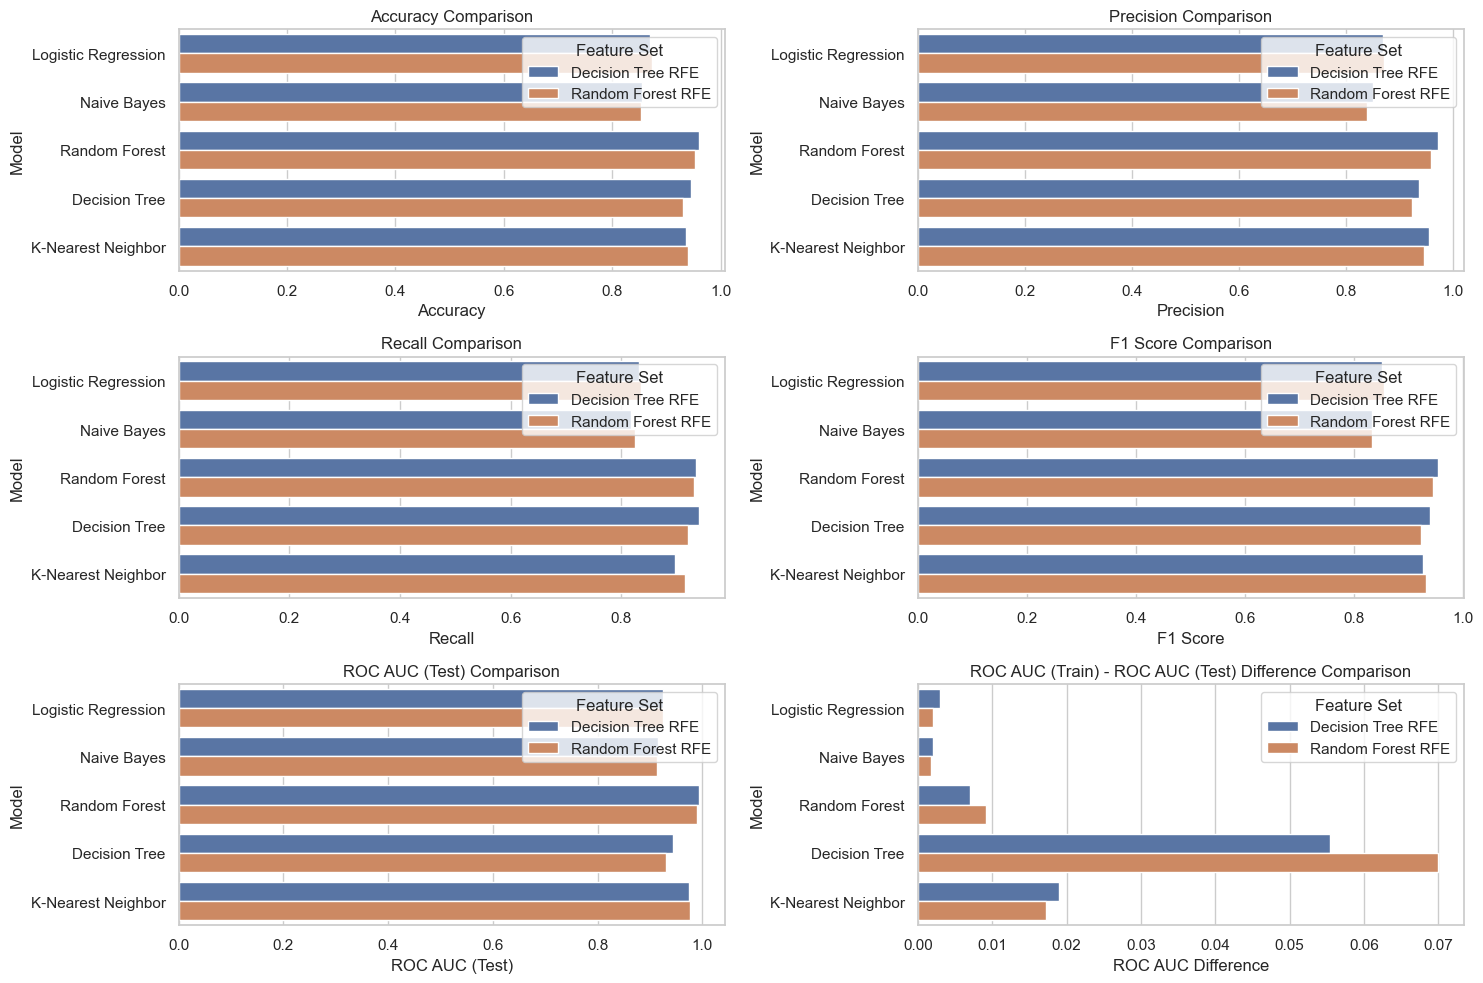

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_metrics_df['ROC AUC Difference'] = (combined_metrics_df['ROC AUC (Train)'] - combined_metrics_df['ROC AUC (Test)']).abs()

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.barplot(x="Accuracy", y="Model", hue="Feature Set", data=combined_metrics_df)
plt.title("Accuracy Comparison")

plt.subplot(3, 2, 2)
sns.barplot(x="Precision", y="Model", hue="Feature Set", data=combined_metrics_df)
plt.title("Precision Comparison")

plt.subplot(3, 2, 3)
sns.barplot(x="Recall", y="Model", hue="Feature Set", data=combined_metrics_df)
plt.title("Recall Comparison")

plt.subplot(3, 2, 4)
sns.barplot(x="F1 Score", y="Model", hue="Feature Set", data=combined_metrics_df)
plt.title("F1 Score Comparison")

plt.subplot(3, 2, 5)
sns.barplot(x="ROC AUC (Test)", y="Model", hue="Feature Set", data=combined_metrics_df)
plt.title("ROC AUC (Test) Comparison")

plt.subplot(3, 2, 6)
sns.barplot(x="ROC AUC Difference", y="Model", hue="Feature Set", data=combined_metrics_df)
plt.title("ROC AUC (Train) - ROC AUC (Test) Difference Comparison")

plt.tight_layout()
plt.show()


## Tuning

#### Tuning Decision Tree

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='precision')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

best_dt_model = grid_search.best_estimator_

best_dt_model.fit(X_train_scaled, y_train)

eval_classification(best_dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)


Best hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
Best cross-validation score: 0.9435808020526709
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13878
           1       0.94      0.92      0.93     10983

    accuracy                           0.94     24861
   macro avg       0.94      0.94      0.94     24861
weighted avg       0.94      0.94      0.94     24861

Accuracy (Test Set): 0.938739
Precission (Test Set): 0.941643
Recall (Test Set): 0.918237
F1-Score (Test Set): 0.929793
roc_auc (test-proba): 0.974515
roc_auc (Train-proba): 0.992609
Confusion Matrix: 
 [[13253   625]
 [  898 10085]]



In [79]:
from sklearn.metrics import roc_auc_score, make_scorer

def custom_roc_auc_train(y_true, y_pred):
    return -roc_auc_score(y_true, y_pred)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=make_scorer(custom_roc_auc_train))

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best cross-validation ROC-AUC (train) score:", best_score)

best_dt_model = grid_search.best_estimator_

eval_classification(best_dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)


Best hyperparameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
Best cross-validation ROC-AUC (train) score: -0.8737614188914311
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     13878
           1       0.91      0.83      0.87     10983

    accuracy                           0.89     24861
   macro avg       0.89      0.88      0.89     24861
weighted avg       0.89      0.89      0.89     24861

Accuracy (Test Set): 0.890632
Precission (Test Set): 0.914360
Recall (Test Set): 0.830192
F1-Score (Test Set): 0.870246
roc_auc (test-proba): 0.949073
roc_auc (Train-proba): 0.949362
Confusion Matrix: 
 [[13024   854]
 [ 1865  9118]]



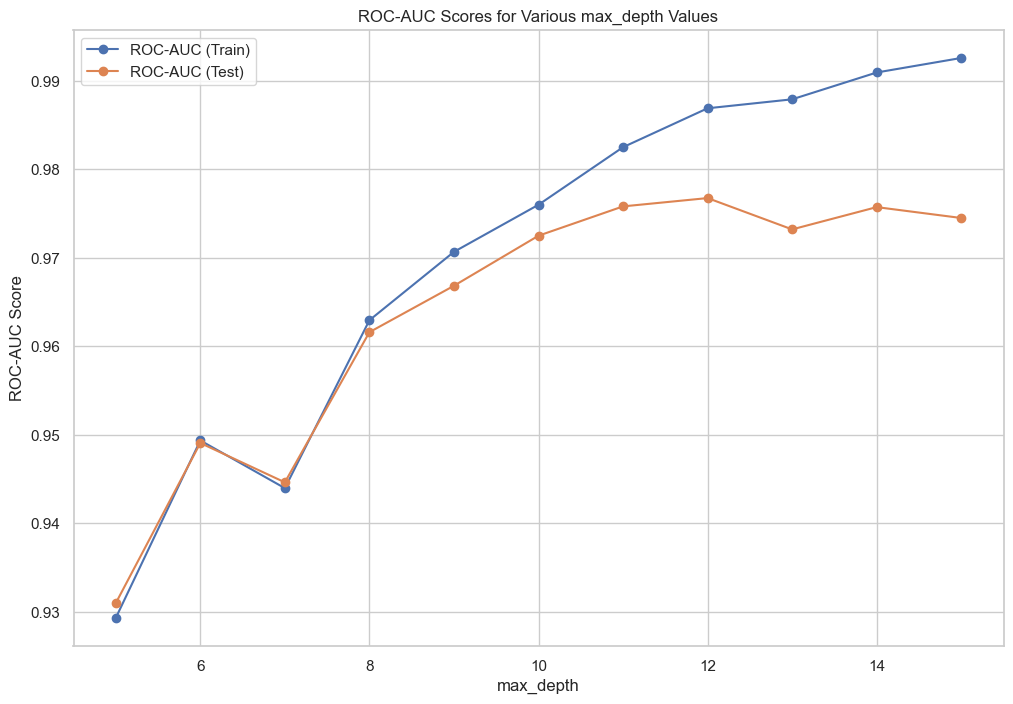

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

results = []

for max_depth in range(5, 16):
    dt_model = DecisionTreeClassifier(max_depth=max_depth, 
                                      max_features='sqrt', 
                                      min_samples_leaf=3, 
                                      min_samples_split=2, 
                                      random_state=42)
    
    dt_model.fit(X_train_scaled, y_train)

    y_train_proba = dt_model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = dt_model.predict_proba(X_test_scaled)[:, 1]
    
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    
    results.append((max_depth, roc_auc_train, roc_auc_test))

results = np.array(results)

plt.figure(figsize=(12, 8))
plt.plot(results[:, 0], results[:, 1], label='ROC-AUC (Train)', marker='o')
plt.plot(results[:, 0], results[:, 2], label='ROC-AUC (Test)', marker='o')
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Various max_depth Values')
plt.legend()
plt.grid(True)
plt.show()


In [81]:
dt_model = DecisionTreeClassifier(max_depth=6, 
                                  max_features='sqrt', 
                                  min_samples_leaf=3, 
                                  min_samples_split=2, 
                                  random_state=42)

dt_model.fit(X_train_scaled, y_train)

eval_classification(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     13878
           1       0.91      0.83      0.87     10983

    accuracy                           0.89     24861
   macro avg       0.89      0.88      0.89     24861
weighted avg       0.89      0.89      0.89     24861

Accuracy (Test Set): 0.890632
Precission (Test Set): 0.914360
Recall (Test Set): 0.830192
F1-Score (Test Set): 0.870246
roc_auc (test-proba): 0.949073
roc_auc (Train-proba): 0.949362
Confusion Matrix: 
 [[13024   854]
 [ 1865  9118]]



In [82]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [
    ("Decision tree", dt),
    ("Decision tree after best tuning", dt_model),
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_test_scores = []
roc_auc_train_scores = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    if hasattr(model, "predict_proba"):
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
    else:
        roc_auc_test = roc_auc_score(y_test, model.decision_function(X_test_scaled))
        roc_auc_train = roc_auc_score(y_train, model.decision_function(X_train_scaled))
    
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_test_scores.append(roc_auc_test)
    roc_auc_train_scores.append(roc_auc_train)

metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC AUC (Test)": roc_auc_test_scores,
    "ROC AUC (Train)": roc_auc_train_scores
})

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train)
0,Decision tree,0.945175,0.93640,0.939725,0.938060,0.944607,1.000000
1,Decision tree after best tuning,0.890632,0.91436,0.830192,0.870246,0.949073,0.949362


#### Tuning Random Forest

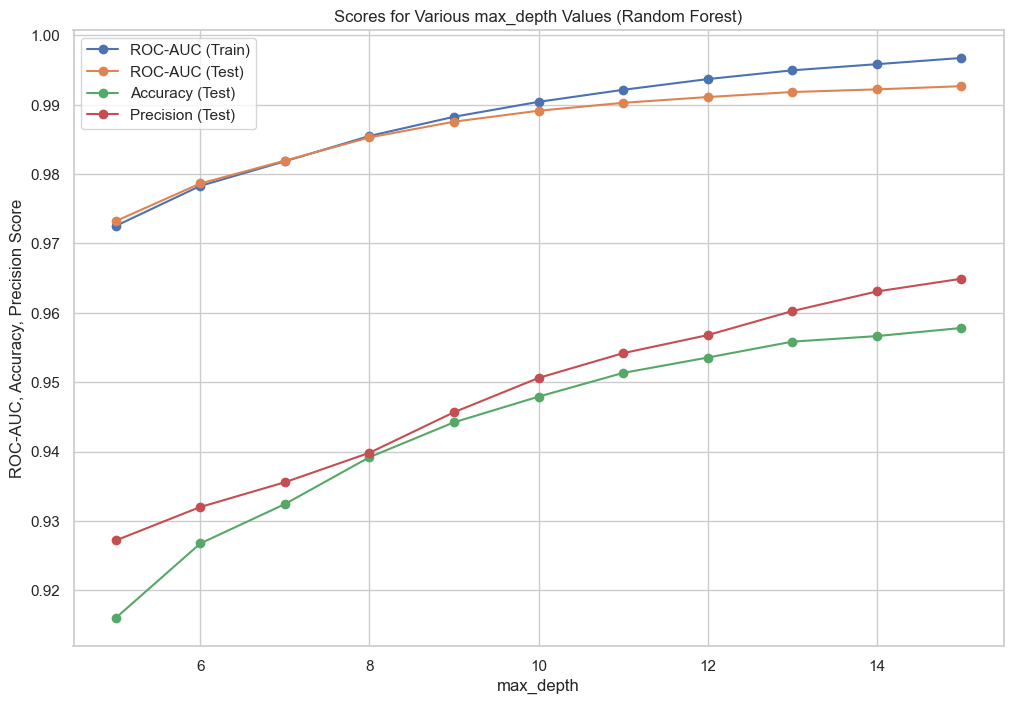

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

results = []

for max_depth in range(5, 16):
    rf_model = RandomForestClassifier(n_estimators=100, 
                                       max_depth=max_depth, 
                                       max_features='sqrt', 
                                       min_samples_leaf=3, 
                                       min_samples_split=2, 
                                       random_state=42)
    
    rf_model.fit(X_train_scaled, y_train)
    
    y_train_proba = rf_model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
    
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    
    y_test_pred = rf_model.predict(X_test_scaled)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    
    results.append((max_depth, roc_auc_train, roc_auc_test, accuracy_test, precision_test))

results = np.array(results)

plt.figure(figsize=(12, 8))
plt.plot(results[:, 0], results[:, 1], label='ROC-AUC (Train)', marker='o')
plt.plot(results[:, 0], results[:, 2], label='ROC-AUC (Test)', marker='o')
plt.plot(results[:, 0], results[:, 3], label='Accuracy (Test)', marker='o')
plt.plot(results[:, 0], results[:, 4], label='Precision (Test)', marker='o')
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC, Accuracy, Precision Score')
plt.title('Scores for Various max_depth Values (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


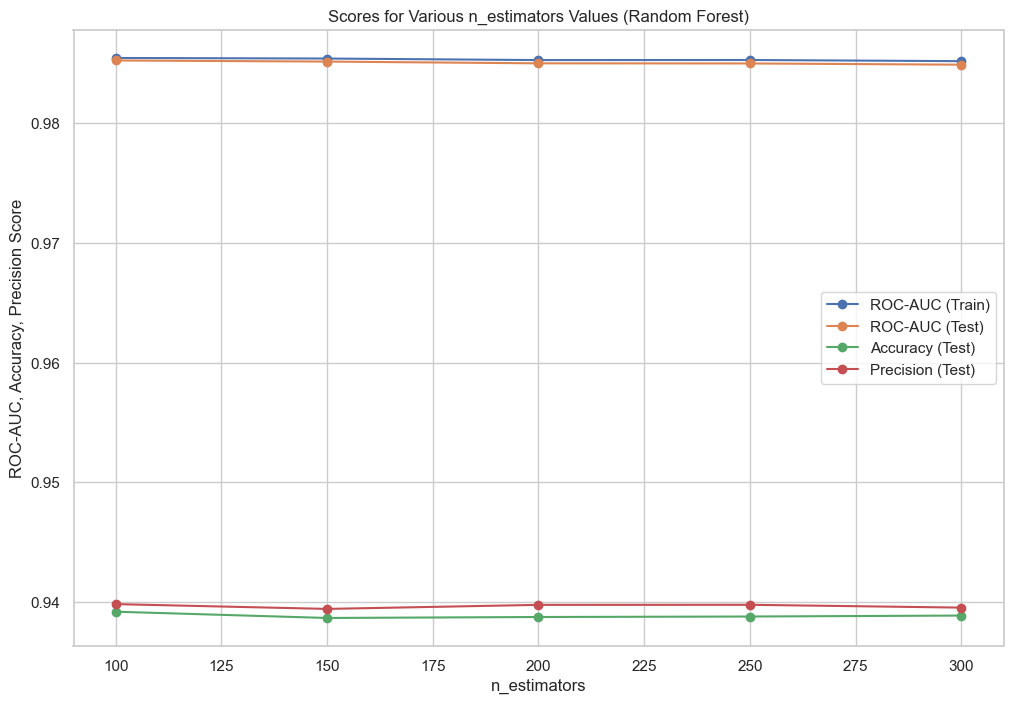

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

results = []

for n_estimators in [100, 150, 200, 250, 300]:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, 
                                       max_depth=8,
                                       max_features='sqrt', 
                                       min_samples_leaf=3, 
                                       min_samples_split=2, 
                                       random_state=42)
    
    rf_model.fit(X_train_scaled, y_train)
    
    y_train_proba = rf_model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
    
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    
    y_test_pred = rf_model.predict(X_test_scaled)
    
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    
    results.append((n_estimators, roc_auc_train, roc_auc_test, accuracy_test, precision_test))

results = np.array(results)

plt.figure(figsize=(12, 8))
plt.plot(results[:, 0], results[:, 1], label='ROC-AUC (Train)', marker='o')
plt.plot(results[:, 0], results[:, 2], label='ROC-AUC (Test)', marker='o')
plt.plot(results[:, 0], results[:, 3], label='Accuracy (Test)', marker='o')
plt.plot(results[:, 0], results[:, 4], label='Precision (Test)', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('ROC-AUC, Accuracy, Precision Score')
plt.title('Scores for Various n_estimators Values (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
rf_model = RandomForestClassifier(n_estimators=250,  # Example value, you can adjust this
                                       max_depth=8, 
                                       max_features='sqrt', 
                                       min_samples_leaf=3, 
                                       min_samples_split=2, 
                                       random_state=42)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

eval_classification(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     13878
           1       0.94      0.92      0.93     10983

    accuracy                           0.94     24861
   macro avg       0.94      0.94      0.94     24861
weighted avg       0.94      0.94      0.94     24861

Accuracy (Test Set): 0.938780
Precission (Test Set): 0.939760
Recall (Test Set): 0.920422
F1-Score (Test Set): 0.929991
roc_auc (test-proba): 0.985018
roc_auc (Train-proba): 0.985307
Confusion Matrix: 
 [[13230   648]
 [  874 10109]]



In [86]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [
    ("Random Forest", rf),
    ("Random Forest after best tuning", rf_model),
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_test_scores = []
roc_auc_train_scores = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    if hasattr(model, "predict_proba"):
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
    else:
        roc_auc_test = roc_auc_score(y_test, model.decision_function(X_test_scaled))
        roc_auc_train = roc_auc_score(y_train, model.decision_function(X_train_scaled))
    
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_test_scores.append(roc_auc_test)
    roc_auc_train_scores.append(roc_auc_train)

metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC AUC (Test)": roc_auc_test_scores,
    "ROC AUC (Train)": roc_auc_train_scores
})

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train)
0,Random Forest,0.959414,0.971183,0.935901,0.953216,0.993015,1.000000
1,Random Forest after best tuning,0.938780,0.939760,0.920422,0.929991,0.985018,0.985307


#### Tuning Logistic Regression

In [87]:
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['none'], 'solver': ['lbfgs', 'newton-cg', 'saga']}
]

lr_model = LogisticRegression(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)

best_lr_model = grid_search.best_estimator_

y_pred = best_lr_model.predict(X_test_scaled)

eval_classification(best_lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 0.5)

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     13878
           1       0.87      0.83      0.85     10983

    accuracy                           0.87     24861
   macro avg       0.87      0.87      0.87     24861
weighted avg       0.87      0.87      0.87     24861

Accuracy (Test Set): 0.869313
Precission (Test Set): 0.868707
Recall (Test Set): 0.829555
F1-Score (Test Set): 0.848680
roc_auc (test-proba): 0.923707
roc_auc (Train-proba): 0.920714
Confusion Matrix: 
 [[12501  1377]
 [ 1872  9111]]



In [88]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [
    ("Logistic Regression", lr),
    ("Logistic Regression after best tuning", best_lr_model),
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_test_scores = []
roc_auc_train_scores = []

for name, model in models:
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    if hasattr(model, "predict_proba"):
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
    else:
        roc_auc_test = roc_auc_score(y_test, model.decision_function(X_test_scaled))
        roc_auc_train = roc_auc_score(y_train, model.decision_function(X_train_scaled))
    
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_test_scores.append(roc_auc_test)
    roc_auc_train_scores.append(roc_auc_train)

metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC AUC (Test)": roc_auc_test_scores,
    "ROC AUC (Train)": roc_auc_train_scores
})


metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train)
0,Logistic Regression,0.870359,0.869032,0.831922,0.850072,0.925018,0.922048
1,Logistic Regression after best tuning,0.869313,0.868707,0.829555,0.848680,0.923707,0.920714


# Conclusion

In [89]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

models = [
    ("Logistic Regression", best_lr_model),
    ("Random Forest", rf_model),
    ("Decision Tree", dt_model)
]

model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_test_scores = []
roc_auc_train_scores = []


for name, model in models:
    model.fit(X_train_scaled, y_train)
    
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    if hasattr(model, "predict_proba"):
        roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1])
    else:
        roc_auc_test = roc_auc_score(y_test, model.decision_function(X_test_scaled))
        roc_auc_train = roc_auc_score(y_train, model.decision_function(X_train_scaled))
    
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_test_scores.append(roc_auc_test)
    roc_auc_train_scores.append(roc_auc_train)

metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
    "ROC AUC (Test)": roc_auc_test_scores,
    "ROC AUC (Train)": roc_auc_train_scores
})

metrics_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC (Test),ROC AUC (Train)
0,Logistic Regression,0.869313,0.868707,0.829555,0.848680,0.923707,0.920714
1,Random Forest,0.938780,0.939760,0.920422,0.929991,0.985018,0.985307
2,Decision Tree,0.890632,0.914360,0.830192,0.870246,0.949073,0.949362


In [90]:
from sklearn.model_selection import cross_val_score, KFold

k = 10
cv = KFold(n_splits=k, shuffle=True, random_state=42)
validation_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')

print(f'Validation scores: {validation_scores}')
print(f'Mean validation accuracy: {validation_scores.mean()}')
print(f'Standard deviation: {validation_scores.std()}')


Validation scores: [0.93895817 0.93594127 0.9369469  0.93684634 0.93724859 0.93674578
 0.93594127 0.93604183 0.93684634 0.93915929]
Mean validation accuracy: 0.9370675784392599
Standard deviation: 0.0010857095395225848
